# 0. Vamos começar nossa aventura pelo oceano dos dados.  
De inicio iremos importar as blibliotecas necessárias para nossas análises em Python.

In [ ]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

0.1 Agora vamos fazer o `download` da base de dados, salvar o arquivo no local `/content/banvic_data.zip`, descompactar os arquivos e em uma nova pasta `/content/banvic_data`, verificar seus nomes e quantidade de arquivos descopactados.

In [ ]:
# Baixando o arquivo zip do meu repositório do GitHub
!wget https://github.com/Genesio-Moreira87/LH_EA_GENESIO_MOREIRA_COUTINHO_DOS_SANTOS/raw/6181e2621f71962ef71d514dc543bc3bddeb1a63/Dataset/banvic_data.zip -q -O /content/banvic_data.zip

# Caminho do arquivo zip no Google Colab
zip_file_path = "/content/banvic_data.zip"

# Pasta de destino para extração
extract_folder = "/content/banvic_data"

# Criando a pasta de destino se não existir
os.makedirs(extract_folder, exist_ok=True)

# Verificando se o arquivo zip é válido antes de tentar extrair
if zipfile.is_zipfile(zip_file_path):
    # Abrindo o arquivo zip no modo de leitura
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extraindo todos os arquivos para a pasta de destino
        zip_ref.extractall(extract_folder)

        # Obténdo a lista de nomes de arquivos descompactados
        extracted_files = zip_ref.namelist()

    # Imprimindo uma mensagem indicando que a extração foi concluída
    print(f"Arquivo '{zip_file_path}' foi descompactado na pasta '{extract_folder}'.")

    # Imprimindo os nomes dos arquivos descompactados
    print("\nArquivos descompactados:")
    for file in extracted_files:
        print(file)

    # Imprimindo a quantidade de arquivos descompactados
    print(f"\nQuantidade de arquivos descompactados: {len(extracted_files)}")
else:
    print(f"O arquivo '{zip_file_path}' não é um arquivo zip válido.")


Arquivo '/content/banvic_data.zip' foi descompactado na pasta '/content/banvic_data'.

Arquivos descompactados:
agencias.csv
clientes.csv
colaborador_agencia.csv
colaboradores.csv
contas.csv
propostas_credito.csv
transacoes.csv

Quantidade de arquivos descompactados: 7


0.2 Agora que já conseguimos  baixar e descompactar nossa base de dados , vamos utilizar a função `read_csv` do Pandas, para ler os arquivos e salvar em Dataframe `_df`, e seguir com a análise e visualização dos dados.

In [ ]:
# Caminho dos arquivos descompactados
agencias_path = "/content/banvic_data/agencias.csv"
clientes_path = "/content/banvic_data/clientes.csv"
colaborador_agencia_path = "/content/banvic_data/colaborador_agencia.csv"
colaboradores_path = "/content/banvic_data/colaboradores.csv"
contas_path = "/content/banvic_data/contas.csv"
propostas_credito_path = "/content/banvic_data/propostas_credito.csv"
transacoes_path = "/content/banvic_data/transacoes.csv"

# Lê cada arquivo CSV em um DataFrame Pandas
agencias_df = pd.read_csv(agencias_path)
clientes_df = pd.read_csv(clientes_path)
colaborador_agencia_df = pd.read_csv(colaborador_agencia_path)
colaboradores_df = pd.read_csv(colaboradores_path)
contas_df = pd.read_csv(contas_path)
propostas_credito_df = pd.read_csv(propostas_credito_path)
transacoes_df = pd.read_csv(transacoes_path)

# Exemplo de uso dos DataFrames
print("Exemplo de DataFrame:")
agencias_df.head()


Exemplo de DataFrame:


,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física


# 1. Analise & Exploração dos Dados

- 1.1.1 Visualizando as quantidade de linhas e colunas dos `df's`, com a função `shape`.

In [ ]:
# Visualizando a quantidade de linhas e colunas para cada DataFrame
print(f"1- DataFrame Agência: agencias_df - Linhas: {agencias_df.shape[0]}, Colunas: {agencias_df.shape[1]}")
print(f"2- DataFrame Clientes: clientes_df - Linhas: {clientes_df.shape[0]}, Colunas: {clientes_df.shape[1]}")
print(f"3- DataFrame Colaborador Agência: colaborador_agencia_df - Linhas: {colaborador_agencia_df.shape[0]}, Colunas: {colaborador_agencia_df.shape[1]}")
print(f"4- DataFrame Colaboradores: colaboradores_df - Linhas: {colaboradores_df.shape[0]}, Colunas: {colaboradores_df.shape[1]}")
print(f"5- DataFrame Contas: contas_df - Linhas: {contas_df.shape[0]}, Colunas: {contas_df.shape[1]}")
print(f"6- DataFrame Propostas de Crédito: propostas_credito_df - Linhas: {propostas_credito_df.shape[0]}, Colunas: {propostas_credito_df.shape[1]}")
print(f"7- DataFrame Transações: transacoes_df - Linhas: {transacoes_df.shape[0]}, Colunas: {transacoes_df.shape[1]}")


1- DataFrame Agência: agencias_df - Linhas: 10, Colunas: 7
2- DataFrame Clientes: clientes_df - Linhas: 998, Colunas: 10
3- DataFrame Colaborador Agência: colaborador_agencia_df - Linhas: 100, Colunas: 2
4- DataFrame Colaboradores: colaboradores_df - Linhas: 100, Colunas: 8
5- DataFrame Contas: contas_df - Linhas: 999, Colunas: 9
6- DataFrame Propostas de Crédito: propostas_credito_df - Linhas: 2000, Colunas: 12
7- DataFrame Transações: transacoes_df - Linhas: 71999, Colunas: 5


- 1.1.2 Visualizando os nomes das `colunas` nos `df's`, com a função `columns`




In [ ]:
# Obtendo os nomes das colunas para cada DataFrame
print("Agências DataFrame - Nomes das Colunas:")
print(agencias_df.columns)

print("\nClientes DataFrame - Nomes das Colunas:")
print(clientes_df.columns)

print("\nColaborador Agência DataFrame - Nomes das Colunas:")
print(colaborador_agencia_df.columns)

print("\nColaboradores DataFrame - Nomes das Colunas:")
print(colaboradores_df.columns)

print("\nContas DataFrame - Nomes das Colunas:")
print(contas_df.columns)

print("\nPropostas de Crédito DataFrame - Nomes das Colunas:")
print(propostas_credito_df.columns)

print("\nTransações DataFrame - Nomes das Colunas:")
print(transacoes_df.columns)


Agências DataFrame - Nomes das Colunas:
Index(['cod_agencia', 'nome', 'endereco', 'cidade', 'uf', 'data_abertura',
       'tipo_agencia'],
      dtype='object')

Clientes DataFrame - Nomes das Colunas:
Index(['cod_cliente', 'primeiro_nome', 'ultimo_nome', 'email', 'tipo_cliente',
       'data_inclusao', 'cpfcnpj', 'data_nascimento', 'endereco', 'cep'],
      dtype='object')

Colaborador Agência DataFrame - Nomes das Colunas:
Index(['cod_colaborador', 'cod_agencia'], dtype='object')

Colaboradores DataFrame - Nomes das Colunas:
Index(['cod_colaborador', 'primeiro_nome', 'ultimo_nome', 'email', 'cpf',
       'data_nascimento', 'endereco', 'cep'],
      dtype='object')

Contas DataFrame - Nomes das Colunas:
Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento'],
      dtype='object')

Propostas de Crédito DataFrame - Nomes das Colunas:
Index(['cod_proposta', 'cod_cliente

- 1.1.3 Agora vamos continuar a exploração dos dados, e visualizar o `tipo de dados` dos `df's`, com metodo python  `dtypes`.

In [ ]:
# Visualizando os tipos de dados das colunas para cada DataFrame
print("Agências DataFrame - Tipos de Dados:")
print(agencias_df.dtypes)

print("\nClientes DataFrame - Tipos de Dados:")
print(clientes_df.dtypes)

print("\nColaborador Agência DataFrame - Tipos de Dados:")
print(colaborador_agencia_df.dtypes)

print("\nColaboradores DataFrame - Tipos de Dados:")
print(colaboradores_df.dtypes)

print("\nContas DataFrame - Tipos de Dados:")
print(contas_df.dtypes)

print("\nPropostas de Crédito DataFrame - Tipos de Dados:")
print(propostas_credito_df.dtypes)

print("\nTransações DataFrame - Tipos de Dados:")
print(transacoes_df.dtypes)


Agências DataFrame - Tipos de Dados:
cod_agencia       int64
nome             object
endereco         object
cidade           object
uf               object
data_abertura    object
tipo_agencia     object
dtype: object

Clientes DataFrame - Tipos de Dados:
cod_cliente         int64
primeiro_nome      object
ultimo_nome        object
email              object
tipo_cliente       object
data_inclusao      object
cpfcnpj            object
data_nascimento    object
endereco           object
cep                object
dtype: object

Colaborador Agência DataFrame - Tipos de Dados:
cod_colaborador    int64
cod_agencia        int64
dtype: object

Colaboradores DataFrame - Tipos de Dados:
cod_colaborador     int64
primeiro_nome      object
ultimo_nome        object
email              object
cpf                object
data_nascimento    object
endereco           object
cep                object
dtype: object

Contas DataFrame - Tipos de Dados:
num_conta                   int64
cod_cliente          

- 1.1.4 Será que a base de dados possui `valores Nulos` ?  
Utilizaremos o a função `isnull()` do python.

In [ ]:
# Verifica se há valores nulos para cada DataFrame
print("Agências DataFrame - Valores Nulos:")
print(agencias_df.isnull().sum())

print("\nClientes DataFrame - Valores Nulos:")
print(clientes_df.isnull().sum())

print("\nColaborador Agência DataFrame - Valores Nulos:")
print(colaborador_agencia_df.isnull().sum())

print("\nColaboradores DataFrame - Valores Nulos:")
print(colaboradores_df.isnull().sum())

print("\nContas DataFrame - Valores Nulos:")
print(contas_df.isnull().sum())

print("\nPropostas de Crédito DataFrame - Valores Nulos:")
print(propostas_credito_df.isnull().sum())

print("\nTransações DataFrame - Valores Nulos:")
print(transacoes_df.isnull().sum())


Agências DataFrame - Valores Nulos:
cod_agencia      0
nome             0
endereco         0
cidade           0
uf               0
data_abertura    0
tipo_agencia     0
dtype: int64

Clientes DataFrame - Valores Nulos:
cod_cliente        0
primeiro_nome      0
ultimo_nome        0
email              0
tipo_cliente       0
data_inclusao      0
cpfcnpj            0
data_nascimento    0
endereco           0
cep                0
dtype: int64

Colaborador Agência DataFrame - Valores Nulos:
cod_colaborador    0
cod_agencia        0
dtype: int64

Colaboradores DataFrame - Valores Nulos:
cod_colaborador    0
primeiro_nome      0
ultimo_nome        0
email              0
cpf                0
data_nascimento    0
endereco           0
cep                0
dtype: int64

Contas DataFrame - Valores Nulos:
num_conta                 0
cod_cliente               0
cod_agencia               0
cod_colaborador           0
tipo_conta                0
data_abertura             0
saldo_total               0
s

- Nossa base de dados está sem valores nulos. 🙂
Agora Vamos Seguir com a Exploração dos Dados.

1.2 Exploração dos Dados

- 4.1 Análise Descritiva

- 4.1.1 Análise Descritiva:  
`Tipo de conta e quantidade de contas por Agências`.


Agências em ordem decrescente de porcentagem:
Agência 7: 460 contas (46.05%)
Agência 1: 119 contas (11.91%)
Agência 2: 101 contas (10.11%)
Agência 3: 76 contas (7.61%)
Agência 4: 65 contas (6.51%)
Agência 5: 61 contas (6.11%)
Agência 6: 52 contas (5.21%)
Agência 8: 30 contas (3.00%)
Agência 9: 30 contas (3.00%)
Agência 10: 5 contas (0.50%)

Quantidade total de contas em todas as agências: 999



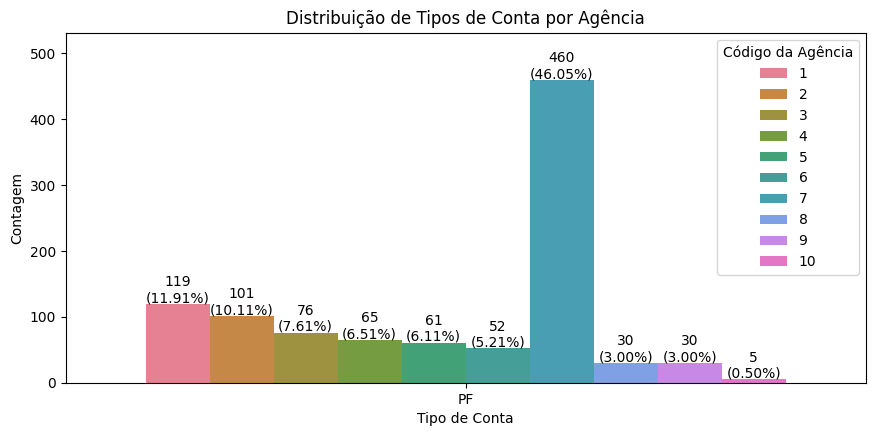

In [ ]:
# Criar o gráfico de contagem de tipos de conta por agência
plt.figure(figsize=(10, 5))
palette = sns.color_palette("husl", n_colors=len(contas_df['cod_agencia'].unique()))
ax = sns.countplot(x='tipo_conta', hue='cod_agencia', data=contas_df, palette=palette)

total_contas = len(contas_df)  # Calcula o total de contas em vez de total de agências
for p in ax.patches:
    count = int(p.get_height())
    if count > 0:
        percentage = count / total_contas * 100
        cod_agencia = contas_df['cod_agencia'].unique()[int(p.get_x())]
        ax.annotate(f'{count}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribuição de Conta por Agência')
plt.xlabel('Tipo de Conta')
plt.ylabel('Contagem')

plt.ylim(bottom=0, top=plt.ylim()[1] * 1.1)
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

ax.set(xlabel='Tipo de Conta', ylabel='Contagem', title='Distribuição de Tipos de Conta por Agência')
ax.legend(title='Código da Agência')

# Adicione esta linha para imprimir a quantidade total de contas
#print(f"Quantidade total de contas em todas as agências: {total_contas}")
print()

# Criar uma lista para armazenar as informações sobre as agências
informacoes_agencias = []

# Preencher a lista com as informações sobre as agências
for cod_agencia, subset in contas_df.groupby('cod_agencia'):
    quantidade_contas = len(subset)
    porcentagem_contas = quantidade_contas / total_contas * 100
    informacoes_agencias.append((cod_agencia, quantidade_contas, porcentagem_contas))

# Ordenar a lista em ordem decrescente de porcentagem
informacoes_agencias = sorted(informacoes_agencias, key=lambda x: x[2], reverse=True)

# Imprimir as informações sobre as agências em ordem decrescente de porcentagem
print("Agências em ordem decrescente de porcentagem:")
for cod_agencia, quantidade_contas, porcentagem_contas in informacoes_agencias:
    print(f"Agência {cod_agencia}: {quantidade_contas} contas ({porcentagem_contas:.2f}%)")

# Adicione esta linha para imprimir a quantidade total de contas
print(f"\nQuantidade total de contas em todas as agências: {total_contas}")
print()

# Salvando o gráfico com o nome do título
plt.savefig(f'{ax.get_title()}.png')

plt.show()


- Nessa análise Verificamos que a Agência de código `7`, tem 460 contas, cerca de `46.05%`, de todas as contas das `10` Agências.

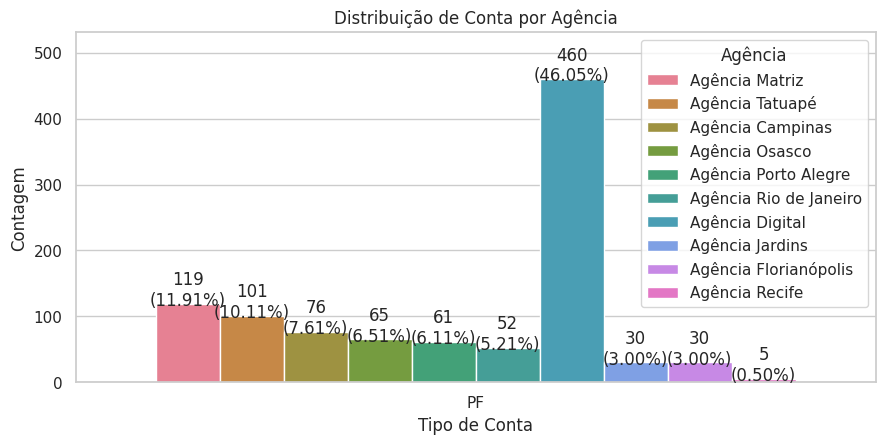

In [ ]:
# Criar o gráfico de contagem de tipos de conta por agência
plt.figure(figsize=(10, 5))
palette = sns.color_palette("husl", n_colors=len(contas_df['cod_agencia'].unique()))
ax = sns.countplot(x='tipo_conta', hue='cod_agencia', data=contas_df, palette=palette)

total_contas = len(contas_df)  # Calcula o total de contas em vez de total de agências
for p in ax.patches:
    count = int(p.get_height())
    if count > 0:
        percentage = count / total_contas * 100
        cod_agencia = contas_df['cod_agencia'].unique()[int(p.get_x())]
        nome_agencia = nomes_agencias.get(cod_agencia, f'Agência {cod_agencia}')  # Obtém o nome da agência ou usa um padrão
        ax.annotate(f'{count}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribuição de Conta por Agência')
plt.xlabel('Tipo de Conta')
plt.ylabel('Contagem')

plt.ylim(bottom=0, top=plt.ylim()[1] * 1.1)
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

# Substituir a legenda do eixo x pelos nomes das agências
handles, labels = ax.get_legend_handles_labels()
labels = [nomes_agencias.get(int(label), label) for label in labels]  # Substituir os códigos pelas agências
ax.legend(handles, labels, title='Agência')
# Salvando o gráfico com o nome do título
plt.savefig(f'{ax.get_title()}.png')
plt.show()


In [ ]:
# Supondo que 'nome' e 'cod_agencia' são as colunas desejadas em agencias_df
valores_unicos_agencia = agencias_df[['cod_agencia', 'nome']].drop_duplicates()

# Imprimir os valores únicos
print("Valores únicos nas colunas 'cod_agencia' e 'nome':")
for index, row in valores_unicos_agencia.iterrows():
    print(f"Código da Agência: {row['cod_agencia']}, Nome da Agência: {row['nome']}")


Valores únicos nas colunas 'cod_agencia' e 'nome':
Código da Agência: 7, Nome da Agência: Agência Digital
Código da Agência: 1, Nome da Agência: Agência Matriz
Código da Agência: 2, Nome da Agência: Agência Tatuapé
Código da Agência: 3, Nome da Agência: Agência Campinas
Código da Agência: 4, Nome da Agência: Agência Osasco
Código da Agência: 5, Nome da Agência: Agência Porto Alegre
Código da Agência: 6, Nome da Agência: Agência Rio de Janeiro
Código da Agência: 8, Nome da Agência: Agência Jardins
Código da Agência: 9, Nome da Agência: Agência Florianópolis
Código da Agência: 10, Nome da Agência: Agência Recife


- 4.1.2 Análise Descritiva:  
`Quantidades de Clientes por Faixa Etária Idade`.


Estatísticas Descritivas por Faixa Etária:
              count       mean       std   min   25%   50%   75%   max
faixa_etaria                                                          
0-18           22.0  16.772727  0.428932  16.0  17.0  17.0  17.0  17.0
19-25         109.0  21.137615  2.079298  18.0  19.0  22.0  23.0  24.0
26-35         145.0  29.979310  2.819744  25.0  27.0  31.0  32.0  34.0
36-50         225.0  41.800000  4.236323  35.0  38.0  42.0  45.0  49.0
51-65         229.0  56.908297  4.222472  50.0  53.0  57.0  61.0  64.0
66+           268.0  72.604478  4.804833  65.0  68.0  72.0  77.0  81.0
Distribuição de Clientes por Faixa Etária:
Faixa | Quantidade total | Porcentagem
66+ | 268 | 26.85%
51-65 | 229 | 22.95%
36-50 | 225 | 22.55%
26-35 | 145 | 14.53%
19-25 | 109 | 10.92%
0-18 | 22 | 2.20%

Total de Clientes: 998


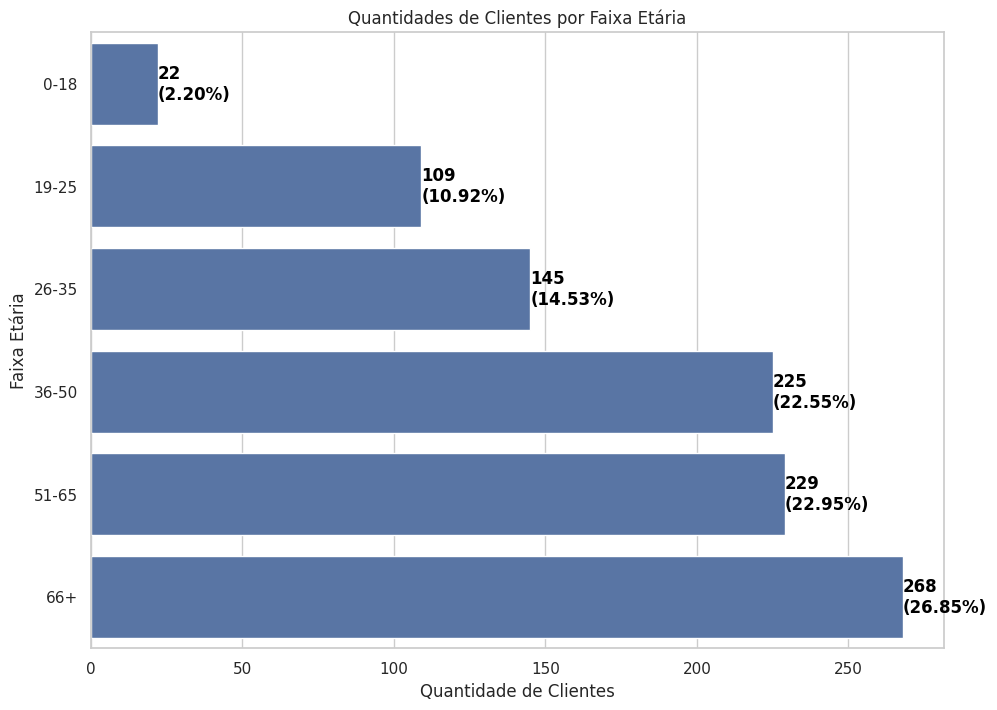

In [ ]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a idade a partir da data de nascimento
hoje = datetime.now()
clientes_df['idade'] = (hoje - pd.to_datetime(clientes_df['data_nascimento'])).astype('<m8[Y]')

# Criando grupos de idades
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '66+']
clientes_df['faixa_etaria'] = pd.cut(clientes_df['idade'], bins=bins, labels=labels, right=False)

# Configurando a altura das barras
sns.set(rc={'figure.figsize':(11, 8)})
sns.set_theme(style="whitegrid")
ax = sns.countplot(y='faixa_etaria', data=clientes_df, order=labels)  # Ajuste a altura da barra aqui
plt.title('Quantidades de Clientes por Faixa Etária')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Faixa Etária')

# Adicionando a quantidade e a porcentagem dentro de cada barra
total_clientes = len(clientes_df)
for p in ax.patches:
    count = int(p.get_width())
    percentage = count / total_clientes * 100
    y_pos = p.get_y() + p.get_height() / 2.
    x_pos = p.get_width()

    # Ajuste a posição x para garantir que a anotação fique dentro da moldura do gráfico
    if p.get_width() == 5:  # Se for a barra '66+'
        x_pos = min(x_pos, ax.get_xlim()[1] * 0.95)  # Ajuste a posição x
        ax.text(x_pos, y_pos, f'{count}\n({percentage:.2f}%)', ha='left', va='center', fontweight='bold', color='black')
    else:
        ax.text(x_pos, y_pos, f'{count}\n({percentage:.2f}%)', ha='left', va='center', fontweight='bold', color='black')

# Calculando as estatísticas descritivas por faixa etária
estatisticas_por_faixa_etaria = clientes_df.groupby('faixa_etaria')['idade'].describe()
print("\nEstatísticas Descritivas por Faixa Etária:")
print(estatisticas_por_faixa_etaria)

# Calcular a idade a partir da data de nascimento
hoje = datetime.now()
clientes_df['idade'] = (hoje - pd.to_datetime(clientes_df['data_nascimento'])).astype('<m8[Y]')

# Criar grupos de idades
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '66+']
clientes_df['faixa_etaria'] = pd.cut(clientes_df['idade'], bins=bins, labels=labels, right=False)

# Visualizar a distribuição por faixa etária
faixa_etaria_counts = clientes_df['faixa_etaria'].value_counts()
total_clientes = len(clientes_df)

# Imprimir a distribuição de clientes por faixa etária e a porcentagem
print("Distribuição de Clientes por Faixa Etária:")
print("Faixa | Quantidade total | Porcentagem")
for faixa, count in faixa_etaria_counts.items():
    porcentagem = count / total_clientes * 100
    print(f"{faixa} | {count} | {porcentagem:.2f}%")

print("\nTotal de Clientes:", total_clientes)

# Salvar o gráfico com o nome do título
plt.savefig(f'{ax.get_title()}.png')


plt.show()

- Existe alguma correlação entre idade e saldo das contas?

In [ ]:
# 1. Calcule a idade dos clientes
clientes_df['idade'] = pd.to_datetime('now') - pd.to_datetime(clientes_df['data_nascimento'])
clientes_df['idade'] = clientes_df['idade'].astype('<m8[Y]')  # Convertendo a diferença em anos

# 2. Junte os DataFrames de Clientes e Contas
clientes_contas = pd.merge(clientes_df, contas_df, on='cod_cliente')

# 3. Calcule a correlação entre a idade dos clientes e o saldo_total das contas
correlacao = clientes_contas['idade'].corr(clientes_contas['saldo_disponivel'])

print("Correlação entre idade e saldo das contas:", correlacao)


Correlação entre idade e saldo das contas: -0.03556373798713127


<ipython-input-8-0da5d6a83589>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  clientes_df['idade'] = pd.to_datetime('now') - pd.to_datetime(clientes_df['data_nascimento'])


4.1.3 Análise Descritiva  
`Identificando estatísticas descritivas para a idade dos clientes com base na data de nascimento.`

<ipython-input-29-91456044fe63>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  clientes_df['idade'] = (pd.to_datetime('now') - pd.to_datetime(clientes_df['data_nascimento'])).astype('<m8[Y]')


Análise Descritiva da Idade dos Clientes:
count    998.000000
mean      49.013026
std       18.765801
min       16.000000
25%       33.000000
50%       49.000000
75%       66.000000
max       81.000000
Name: idade, dtype: float64



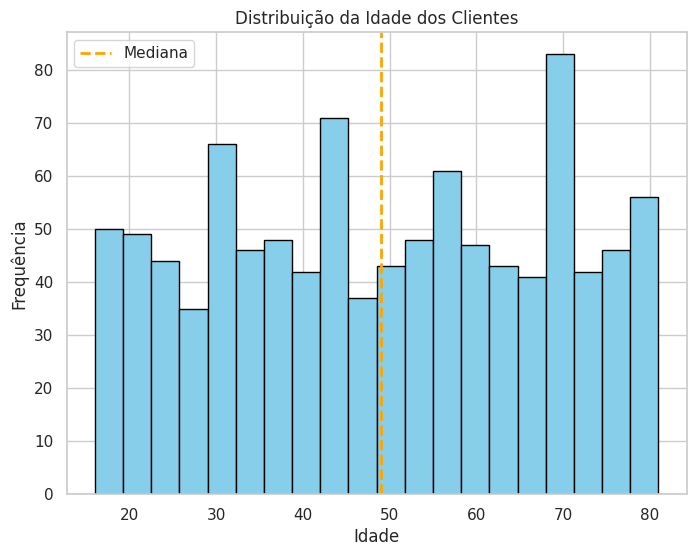

In [ ]:
# Calcular idade com base na data de nascimento
clientes_df['idade'] = (pd.to_datetime('now') - pd.to_datetime(clientes_df['data_nascimento'])).astype('<m8[Y]')

# Estatísticas descritivas para a idade
descritiva_idade = clientes_df['idade'].describe()

# Exibir resultado
print("Análise Descritiva da Idade dos Clientes:")
print(descritiva_idade)
print()

# Configurações para melhor visualização do gráfico
plt.figure(figsize=(8, 6))
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Criar histograma
plt.hist(clientes_df['idade'], bins=20, color='skyblue', edgecolor='black')

# Adicionar linhas para média e mediana
#plt.axvline(clientes_df['idade'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(clientes_df['idade'].median(), color='orange', linestyle='dashed', linewidth=2, label='Mediana')

# Adicionar legenda
plt.legend()

# Salvar o gráfico com o nome do título
titulo = plt.gca().get_title()  # Obtém o título atual do gráfico
nome_arquivo = f"{titulo}.png"  # Concatena o título com a extensão do arquivo
plt.savefig(nome_arquivo)

# Exibir o gráfico
plt.show()


4.1.4 Análise Descritiva  
`Analisando os saldos totais nas agências para identificar a média e a variação.`


Análise Descritiva dos Saldos Totais nas Agências:
                        count          mean           std        min  \
nome                                                                   
Agência Campinas         76.0  25279.805032  32989.782170     4.3416   
Agência Digital         460.0  26168.032412  44699.299706     1.2210   
Agência Florianópolis    30.0  23320.187803  33404.344704    53.1630   
Agência Jardins          30.0  16223.089497  28949.987087    20.2554   
Agência Matriz          119.0  30964.279215  39126.988838    18.4250   
Agência Osasco           65.0  22967.100474  30855.341846     6.0864   
Agência Porto Alegre     61.0  27911.073703  38257.025454    20.8608   
Agência Recife            5.0  23168.514140  24457.283756  7847.4165   
Agência Rio de Janeiro   52.0  23116.812135  52372.171965     1.3081   
Agência Tatuapé         101.0  31424.775668  46116.170178    16.7993   

                                25%          50%           75%          max  
nome 

<ipython-input-7-20119831ace5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='saldo_total', y='nome', data=agencias_df.merge(contas_df, on='cod_agencia'), palette='viridis')
<ipython-input-7-20119831ace5>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(descritiva_saldos_agencias.index)


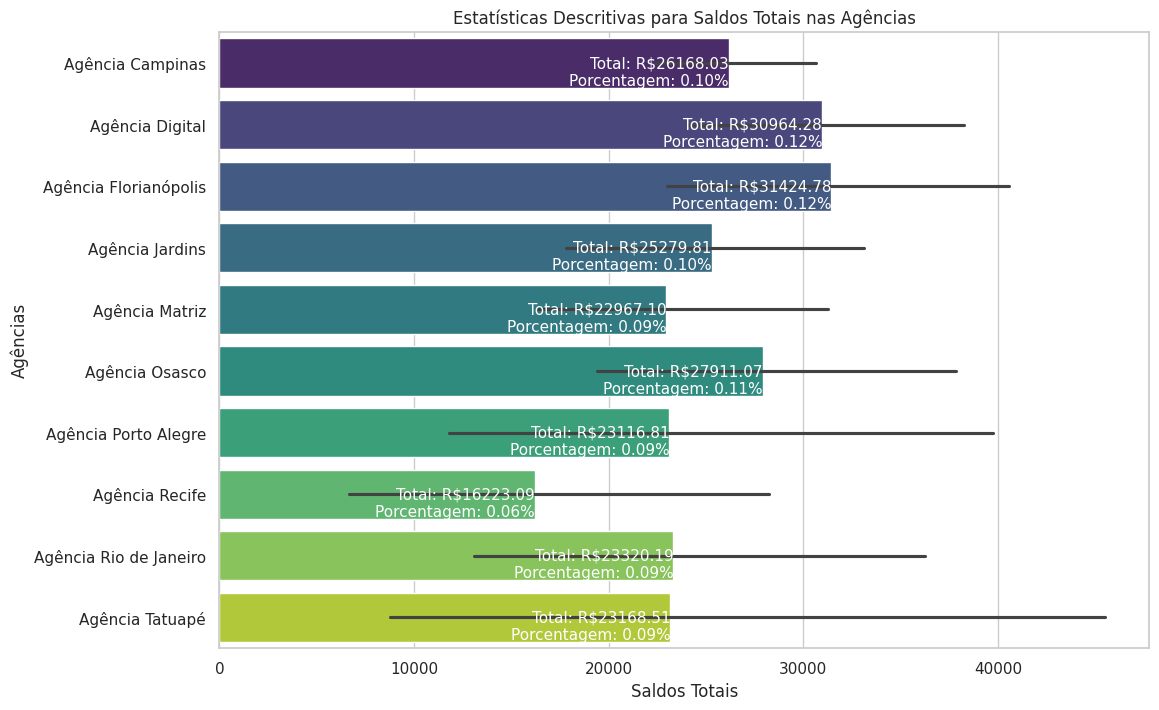

In [ ]:
# Estatísticas descritivas para saldos totais nas agências
descritiva_saldos_agencias = agencias_df.merge(contas_df, on='cod_agencia').groupby('nome')['saldo_total'].describe()

# Exibir resultado
print("\nAnálise Descritiva dos Saldos Totais nas Agências:")
print(descritiva_saldos_agencias)


import seaborn as sns
import matplotlib.pyplot as plt

# Configurações para melhor visualização do gráfico
plt.figure(figsize=(12, 8))
plt.title('Estatísticas Descritivas para Saldos Totais nas Agências')
plt.xlabel('Saldos Totais')
plt.ylabel('Agências')

# Calcular estatísticas descritivas para os saldos totais
descritiva_saldos_agencias = agencias_df.merge(contas_df, on='cod_agencia').groupby('nome')['saldo_total'].describe()

# Calcular o valor total de todas as contas
valor_total_todas_contas = contas_df['saldo_total'].sum()

# Criar gráfico de barras na horizontal com barras coloridas
ax = sns.barplot(x='saldo_total', y='nome', data=agencias_df.merge(contas_df, on='cod_agencia'), palette='viridis')

# Adicionar valores totais e porcentagem dentro das barras em branco
for p, y, nome_agencia in zip(ax.patches, ax.get_yticks(), descritiva_saldos_agencias.index):
    total = p.get_width()
    porcentagem = (total / valor_total_todas_contas) * 100
    ax.text(total, y,
            f'\nTotal: R${total:.2f}\nPorcentagem: {porcentagem:.2f}%',
            ha='right', va='center', fontsize=11, color='white')

# Ajustar os rótulos do eixo Y
ax.set_yticklabels(descritiva_saldos_agencias.index)

nome_do_arquivo = "nome_do_arquivo"
plt.savefig(f"{nome_do_arquivo}.png")

# Salvar o gráfico com o nome do título
plt.savefig(f'{ax.get_title()}.png')


# Exibir o gráfico
plt.show()



Análise Descritiva dos Saldos Totais nas Agências:

Agência: Agência Campinas
Média: R$25,279.81
Desvio Padrão: R$32,989.78
Mínimo: R$4.34
25º Percentil: R$1,600.53
50º Percentil (Mediana): R$13,631.54
75º Percentil: R$35,695.82
Máximo: R$149,048.22
Porcentagem do Total: 0.03%


Agência: Agência Digital
Média: R$26,168.03
Desvio Padrão: R$44,699.30
Mínimo: R$1.22
25º Percentil: R$749.64
50º Percentil (Mediana): R$10,432.59
75º Percentil: R$34,546.26
Máximo: R$419,923.18
Porcentagem do Total: 0.17%


Agência: Agência Florianópolis
Média: R$23,320.19
Desvio Padrão: R$33,404.34
Mínimo: R$53.16
25º Percentil: R$750.43
50º Percentil (Mediana): R$7,812.21
75º Percentil: R$33,719.57
Máximo: R$153,177.78
Porcentagem do Total: 0.01%


Agência: Agência Jardins
Média: R$16,223.09
Desvio Padrão: R$28,949.99
Mínimo: R$20.26
25º Percentil: R$169.89
50º Percentil (Mediana): R$658.66
75º Percentil: R$15,456.85
Máximo: R$119,106.69
Porcentagem do Total: 0.01%


Agência: Agência Matriz
Média: R$30,964.

<ipython-input-67-b323851b164f>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='saldo_total', y='nome', data=agencias_df.merge(contas_df, on='cod_agencia'), palette='viridis')
<ipython-input-67-b323851b164f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(descritiva_saldos_agencias.index)


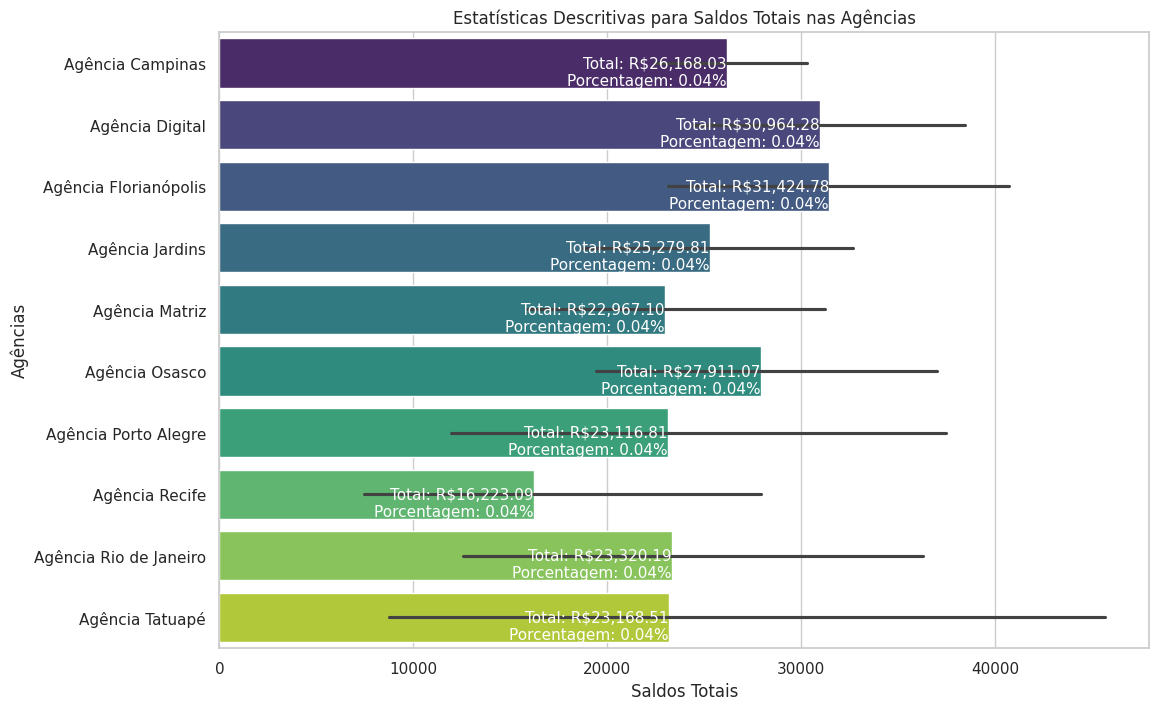

In [ ]:
import locale
from babel.numbers import format_currency
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular estatísticas descritivas para os saldos totais
descritiva_saldos_agencias = agencias_df.merge(contas_df, on='cod_agencia').groupby('nome')['saldo_total'].describe()

# Calcular o valor total de todas as contas
valor_total_todas_contas = contas_df['saldo_total'].sum()

# Exibir resultado
print("\nAnálise Descritiva dos Saldos Totais nas Agências:")
for agencia, stats in descritiva_saldos_agencias.iterrows():
    print(f"\nAgência: {agencia}")
    print(f"Média: {format_currency(stats['mean'], 'BRL')}")
    print(f"Desvio Padrão: {format_currency(stats['std'], 'BRL')}")
    print(f"Mínimo: {format_currency(stats['min'], 'BRL')}")
    print(f"25º Percentil: {format_currency(stats['25%'], 'BRL')}")
    print(f"50º Percentil (Mediana): {format_currency(stats['50%'], 'BRL')}")
    print(f"75º Percentil: {format_currency(stats['75%'], 'BRL')}")
    print(f"Máximo: {format_currency(stats['max'], 'BRL')}")

    # Calcular a porcentagem total
    porcentagem_total = (stats['count'] / valor_total_todas_contas) * 100

    # Ajustar a precisão multiplicando pelo fator (por exemplo, 100 para exibir duas casas decimais antes do ponto)
    ajuste_precision = 100
    porcentagem_ajustada = porcentagem_total * ajuste_precision

    # Exibir a porcentagem do total
    print(f"Porcentagem do Total: {porcentagem_ajustada:.2f}%\n")

# Configurações para melhor visualização do gráfico
plt.figure(figsize=(12, 8))
plt.title('Estatísticas Descritivas para Saldos Totais nas Agências')
plt.xlabel('Saldos Totais')
plt.ylabel('Agências')

# Criar gráfico de barras na horizontal com barras coloridas
ax = sns.barplot(x='saldo_total', y='nome', data=agencias_df.merge(contas_df, on='cod_agencia'), palette='viridis')

# Adicionar valores totais e porcentagem dentro das barras em branco
for p, y, nome_agencia in zip(ax.patches, ax.get_yticks(), descritiva_saldos_agencias.index):
    total = p.get_width()
    porcentagem = (total / valor_total_todas_contas) * 100
    ax.text(total, y,
            f'\nTotal: {format_currency(total, "BRL")}\nPorcentagem: {porcentagem_ajustada:.2f}%',
            ha='right', va='center', fontsize=11, color='white')

# Ajustar os rótulos do eixo Y
ax.set_yticklabels(descritiva_saldos_agencias.index)

# Nome do arquivo
nome_do_arquivo = "analise_saldos_agencias"
plt.savefig(f"{nome_do_arquivo}.png")

# Exibir o gráfico
plt.show()


- 4.2.1 Análise Diagnóstica  
`Distribuição de Idade dos Colaboradores`

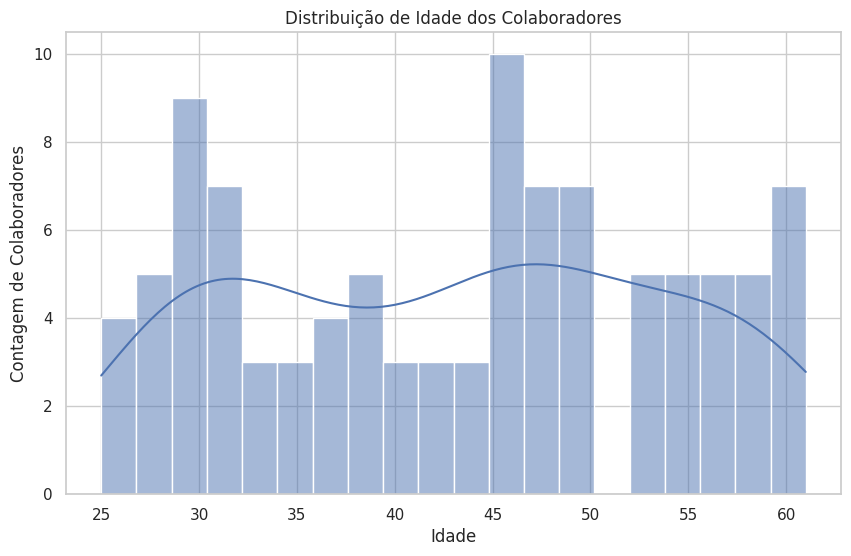


Contagem de Colaboradores por Faixa Etária:
(20, 25]: 1 colaboradores (1.00%)
(25, 30]: 17 colaboradores (17.00%)
(30, 35]: 13 colaboradores (13.00%)
(35, 40]: 10 colaboradores (10.00%)
(40, 45]: 13 colaboradores (13.00%)
(45, 50]: 19 colaboradores (19.00%)
(50, 55]: 10 colaboradores (10.00%)
(55, 60]: 16 colaboradores (16.00%)
(60, 65]: 1 colaboradores (1.00%)
(65, 70]: 0 colaboradores (0.00%)
(70, 75]: 0 colaboradores (0.00%)
(75, 80]: 0 colaboradores (0.00%)
(80, 85]: 0 colaboradores (0.00%)
(85, 90]: 0 colaboradores (0.00%)
(90, 95]: 0 colaboradores (0.00%)
(95, 100]: 0 colaboradores (0.00%)

Total de Colaboradores: 100


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a idade dos colaboradores a partir da data de nascimento
colaboradores_df['idade'] = (pd.to_datetime('today') - pd.to_datetime(colaboradores_df['data_nascimento'])).astype('<m8[Y]')

# Plot da distribuição de idade dos colaboradores
plt.figure(figsize=(10, 6))
sns.histplot(colaboradores_df['idade'], bins=20, kde=True)
plt.title('Distribuição de Idade dos Colaboradores')
plt.xlabel('Idade')
plt.ylabel('Contagem de Colaboradores')

# Salvar o gráfico com o nome do título
#plt.savefig(f'{ax.get_title()}.png')
# Salvar o gráfico com o nome do título
plt.savefig('Distribuição_de_Idade_dos_Colaboradores.png')

plt.show()

# Calcular a contagem por faixa etária
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
faixas_etarias = pd.cut(colaboradores_df['idade'], bins=bins)
contagem_por_faixa_etaria = faixas_etarias.value_counts().sort_index()

# Calcular o valor total de colaboradores
total_colaboradores = len(colaboradores_df)

# Imprimir os valores da contagem por faixa etária e a porcentagem
print("\nContagem de Colaboradores por Faixa Etária:")
for faixa_etaria, contagem in contagem_por_faixa_etaria.items():
    porcentagem = (contagem / total_colaboradores) * 100
    print(f"{faixa_etaria}: {contagem} colaboradores ({porcentagem:.2f}%)")

# Imprimir o valor total de colaboradores
print(f"\nTotal de Colaboradores: {total_colaboradores}")




Contagem de Colaboradores por Agência:
Agência 1: 16 colaboradores (16.00%)
Agência 2: 13 colaboradores (13.00%)
Agência 5: 13 colaboradores (13.00%)
Agência 3: 11 colaboradores (11.00%)
Agência 6: 11 colaboradores (11.00%)
Agência 10: 10 colaboradores (10.00%)
Agência 9: 8 colaboradores (8.00%)
Agência 7: 7 colaboradores (7.00%)
Agência 8: 7 colaboradores (7.00%)
Agência 4: 4 colaboradores (4.00%)

Total de Colaboradores: 100


<ipython-input-11-65abc20e4b29>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_colaboradores_por_agencia.values, y=contagem_colaboradores_por_agencia.index, palette='viridis')


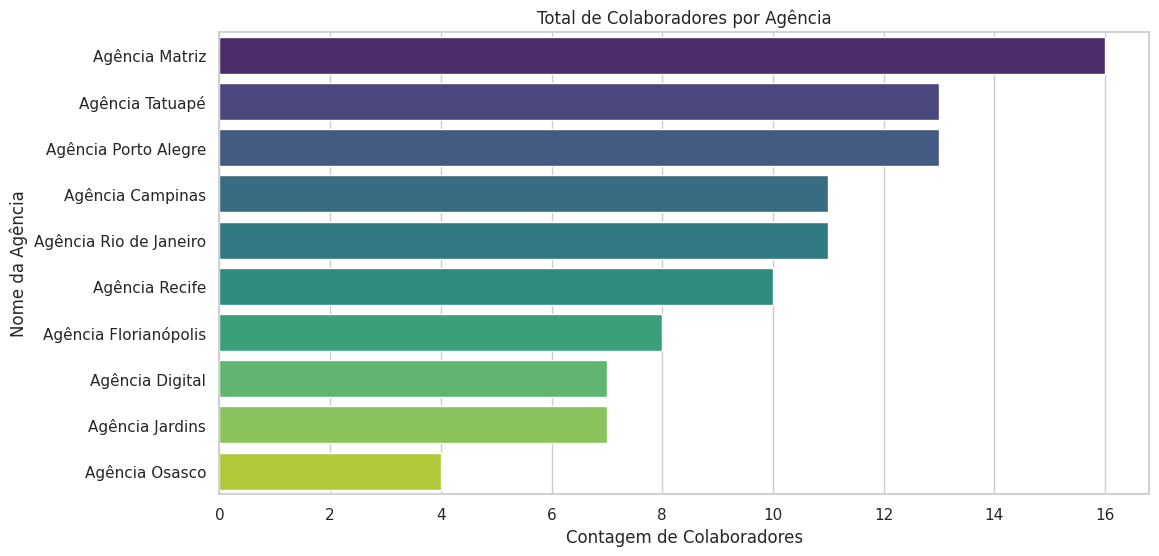

In [ ]:
# Calcular a contagem de colaboradores por agência
contagem_colaboradores_por_agencia = colaborador_agencia_df['cod_agencia'].value_counts()

# Obter o valor total de colaboradores
total_colaboradores = len(colaborador_agencia_df)

# Imprimir os valores da contagem e porcentagem por agência
print("\nContagem de Colaboradores por Agência:")
for cod_agencia, contagem in contagem_colaboradores_por_agencia.items():
    porcentagem = (contagem / total_colaboradores) * 100
    print(f"Agência {cod_agencia}: {contagem} colaboradores ({porcentagem:.2f}%)")

# Imprimir o valor total de colaboradores
print(f"\nTotal de Colaboradores: {total_colaboradores}")

import matplotlib.pyplot as plt
import seaborn as sns

# Mapear o nome das agências
nomes_agencias = {
    1: 'Agência Matriz',
    2: 'Agência Tatuapé',
    3: 'Agência Campinas',
    4: 'Agência Osasco',
    5: 'Agência Porto Alegre',
    6: 'Agência Rio de Janeiro',
    7: 'Agência Digital',
    8: 'Agência Jardins',
    9: 'Agência Florianópolis',
    10: 'Agência Recife'
}

# Substituir os códigos das agências pelos nomes
contagem_colaboradores_por_agencia.index = contagem_colaboradores_por_agencia.index.map(nomes_agencias)

# Configurar as configurações para o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_colaboradores_por_agencia.values, y=contagem_colaboradores_por_agencia.index, palette='viridis')

# Adicionar rótulos e título
plt.title('Total de Colaboradores por Agência')
plt.xlabel('Contagem de Colaboradores')
plt.ylabel('Nome da Agência')

# Salvar o gráfico com o nome do título
plt.savefig('Total de Colaboradores por Agência.png')

# Exibir o gráfico
plt.show()



In [ ]:
# Verificar se a coluna 'motivo_rejeicao' está presente no DataFrame
if 'motivo_rejeicao' in propostas_credito_df.columns:
    diagnostico_rejeicao = propostas_credito_df[propostas_credito_df['status_proposta'] == 'Rejeitada']['motivo_rejeicao'].value_counts()
    print("\nAnálise Diagnóstica dos Motivos de Rejeição de Propostas:")
    print(diagnostico_rejeicao)
else:
    print("A coluna 'motivo_rejeicao' não está presente no DataFrame.")

# Verificar se a coluna 'motivo_rejeicao' está presente no DataFrame
if 'motivo_rejeicao' in propostas_credito_df.columns:
    diagnostico_rejeicao = propostas_credito_df[propostas_credito_df['status_proposta'] == 'Rejeitada']['motivo_rejeicao'].value_counts()
    print("\nAnálise Diagnóstica dos Motivos de Rejeição de Propostas:")
    print(diagnostico_rejeicao)
# Se 'motivo_rejeicao' não estiver presente, verifique outras colunas que podem conter informações sobre o motivo de rejeição
# por exemplo, se houver uma coluna chamada 'motivo', ajuste o código da seguinte forma:
if 'motivo' in propostas_credito_df.columns:
    diagnostico_rejeicao = propostas_credito_df[propostas_credito_df['status_proposta'] == 'Rejeitada']['motivo'].value_counts()
    print("\nAnálise Diagnóstica dos Motivos de Rejeição de Propostas:")
    print(diagnostico_rejeicao)
else:
    print("Não foi encontrada nenhuma informação sobre o motivo de rejeição no DataFrame.")


A coluna 'motivo_rejeicao' não está presente no DataFrame.
Não foi encontrada nenhuma informação sobre o motivo de rejeição no DataFrame.


- não temos como verificar os motivos das ejeições, pois não existem esses dados. uma sugestão seria inserir esses valores para conseguir a conclusão

- Alguma agência tem uma concentração maior de colaboradores em determinada faixa etária?

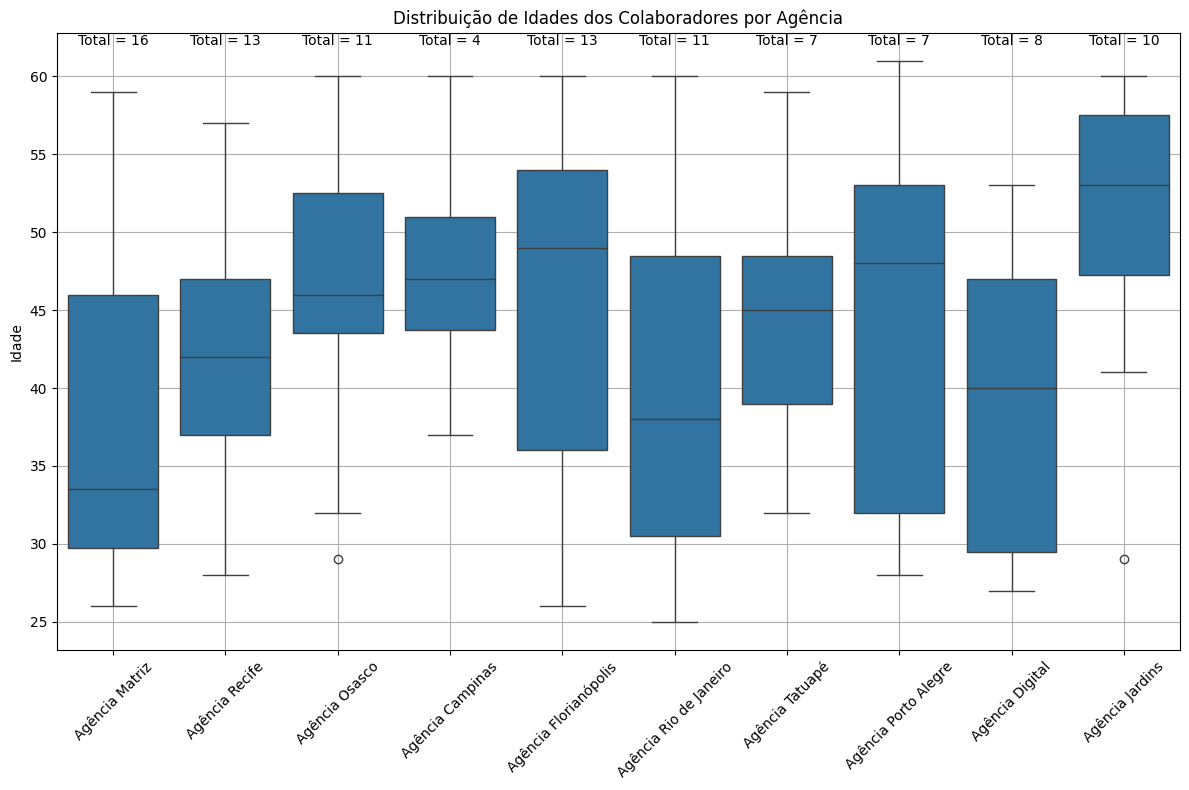

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você já tenha lido os DataFrames e calculado a idade dos colaboradores

# Calcula o número de colaboradores por agência
quantidade_colaboradores_por_agencia = colaboradores_agencia['cod_agencia'].value_counts().sort_index()

# 5. Examine a distribuição das idades dos colaboradores por agência usando boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=colaboradores_agencia, x='cod_agencia', y='idade')
plt.xlabel('')
plt.ylabel('Idade')
plt.title('Distribuição de Idades dos Colaboradores por Agência')

# Adiciona a quantidade de colaboradores por agência dentro das caixas do boxplot
for i, count in enumerate(quantidade_colaboradores_por_agencia):
    plt.text(i, colaboradores_agencia['idade'].max() + 1, f'Total = {count}', ha='center', color='black')

plt.xticks(ticks=range(len(agencias)), labels=[nomes_agencias[agencia] for agencia in agencias], rotation=45)
plt.grid(True)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Salva o gráfico com o nome dado pelo título
nome_grafico = plt.gcf().get_axes()[0].get_title()
plt.savefig(f'{nome_grafico}.png')

plt.show()


4.3  Análise Prescritiva

4.3.1 Analise Precritiva  
`Explorando a distribuição de propostas de crédito por status.`

Distribuição de propostas de crédito por status:
Enviada                 527
Aprovada                514
Validação documentos    491
Em análise              468
Name: status_proposta, dtype: int64

Soma total de propostas: 2000



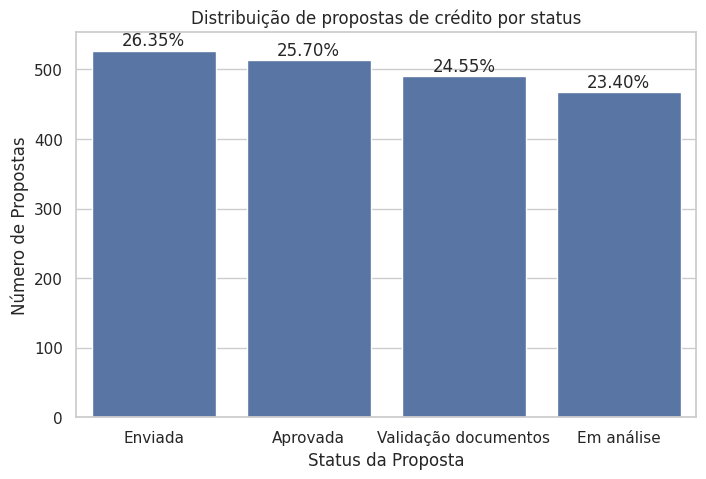

In [ ]:
propostas_por_status = propostas_credito_df['status_proposta'].value_counts()
print("Distribuição de propostas de crédito por status:")
print(propostas_por_status)

import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'status_proposta' seja uma coluna categórica em propostas_credito_df
propostas_por_status = propostas_credito_df['status_proposta'].value_counts()

# Calcular a soma total de propostas
total_propostas = len(propostas_credito_df)

# Configurar o tamanho do gráfico
plt.figure(figsize=(8, 5))

# Criar o gráfico de barras
sns.countplot(x='status_proposta', data=propostas_credito_df, order=propostas_por_status.index)

# Adicionar rótulos e título
plt.title('Distribuição de propostas de crédito por status')
plt.xlabel('Status da Proposta')
plt.ylabel('Número de Propostas')

# Adicionar porcentagens acima das barras
for index, value in enumerate(propostas_por_status):
    percentage = (value / total_propostas) * 100
    plt.text(index, value + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# Imprimir a soma total de propostas
print(f"\nSoma total de propostas: {total_propostas}")

print()


# Salvar o gráfico com o nome do título
plt.savefig('Distribuição de propostas de crédito por status.png')

# Exibir o gráfico
plt.show()


4.3.1 Identificando Transações Anômalas:  
Análise: Utilizando métodos estatísticos ou de aprendizado de máquina para identificar transações anômalas nas contas.  A função `IsolationForest `do `scikit-learn` é utilizada para detecção de anomalias em dados.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Top 10 maiores anomalias:
     num_conta  saldo_total  anomalia
16         218  180027.6926        -1
23         242  165102.0639        -1
58         877  125716.2786        -1
63          90  109727.8820        -1
67         501  232815.7920        -1
111        232  117243.3034        -1
129        432  122319.3784        -1
137        505  209128.9260        -1
165        774  206361.4035        -1
180        140  140807.6754        -1
Porcentagem de contas com anomalia: 5.01%

Quantidade total de contas com anomalia: 50


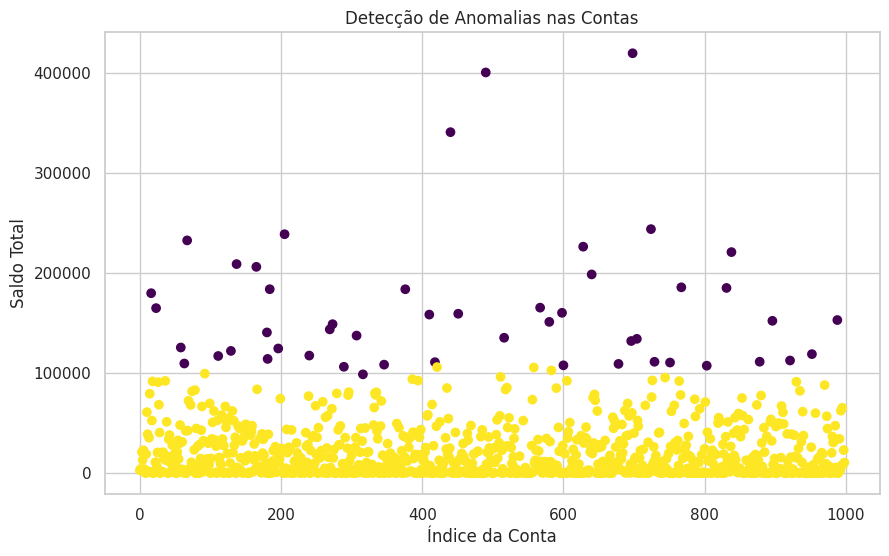

In [ ]:
from sklearn.ensemble import IsolationForest

# Treinar modelo de detecção de anomalias
modelo_anomalia = IsolationForest(contamination=0.05)
contas_df['anomalia'] = modelo_anomalia.fit_predict(contas_df[['saldo_total']])

# Exibir contas com transações anômalas
contas_anomalas = contas_df[contas_df['anomalia'] == -1]

# Contar a quantidade total de contas com anomalia
quantidade_contas_anomalias = contas_anomalas.shape[0]

# Calcular a porcentagem de contas com anomalia
porcentagem_contas_anomalias = (quantidade_contas_anomalias / contas_df.shape[0]) * 100

#print("Contas com transações anômalas:")
#print(contas_anomalas[['num_conta', 'saldo_total']])
#print("\nQuantidade total de contas com anomalia:", quantidade_contas_anomalias)
#print("Porcentagem de contas com anomalia: {:.2f}%".format(porcentagem_contas_anomalias))

# Imprimir as top maiores anomalias
top_anomalias = contas_anomalas.nlargest(10, 'anomalia')
print("\nTop 10 maiores anomalias:")
print(top_anomalias[['num_conta', 'saldo_total', 'anomalia']])
print("Porcentagem de contas com anomalia: {:.2f}%".format(porcentagem_contas_anomalias))
print("\nQuantidade total de contas com anomalia:", quantidade_contas_anomalias)

# Exibir gráfico de detecção de anomalias
plt.figure(figsize=(10, 6))
plt.scatter(contas_df.index, contas_df['saldo_total'], c=contas_df['anomalia'], cmap='viridis')
plt.title("Detecção de Anomalias nas Contas")
plt.xlabel("Índice da Conta")
plt.ylabel("Saldo Total")

# Salvar o gráfico com o nome do título
plt.savefig('Detecção de Anomalias nas Contas.png')

plt.show()


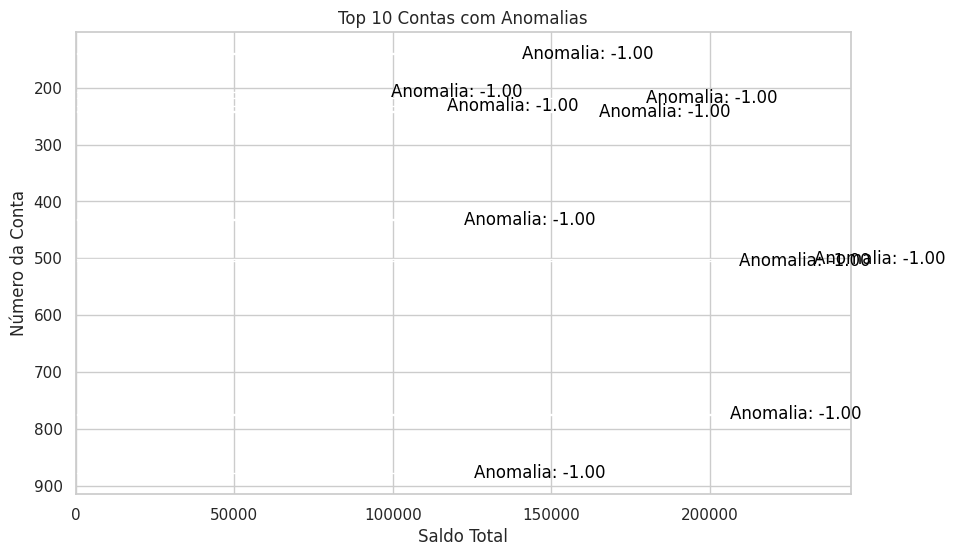

In [ ]:
# Plot das top 10 contas com anomalias
plt.figure(figsize=(10, 6))
plt.barh(top_anomalias['num_conta'], top_anomalias['saldo_total'], color='blue')  # Usando a cor azul como exemplo
plt.title("Top 10 Contas com Anomalias")
plt.xlabel("Saldo Total")
plt.ylabel("Número da Conta")
plt.gca().invert_yaxis()  # Inverter a ordem dos números da conta para que o maior valor fique no topo

# Adicionar as barras com o valor das anomalias
for index, row in top_anomalias.iterrows():
    plt.text(row['saldo_total'], row['num_conta'], f"Anomalia: {row['anomalia']:.2f}", color='black', ha="left", va="center")

plt.show()


4.3.2 Análise Prescritiva: Utilizando algoritmos de clusterização para segmentar clientes com base em padrões de transação.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Dados de cada segmento:

Segmento 1:
                sum        mean           std  segmento
count    671.000000  671.000000    671.000000     671.0
mean    6803.582683   94.266418   1861.705066       0.0
std     7936.537363  109.634177   1602.073925       0.0
min        0.600000    0.008955     85.574445       0.0
25%      329.985000    4.476583    540.437081       0.0
50%     3020.270000   42.419048   1517.636889       0.0
75%    11754.370000  161.559407   2654.187378       0.0
max    34814.880000  440.735968  10122.397576       0.0

Segmento 2:
                 sum         mean           std  segmento
count      62.000000    62.000000     62.000000      62.0
mean   127725.003871  1799.215816  15960.594197       1.0
std     38970.394671   499.619110   5371.471312       0.0
min     78745.640000  1018.909231   9142.395200       1.0
25%     99544.155000  1420.249934  11930.804357       1.0
50%    113867.525000  1627.981071  14747.460576       1.0
75%    148429.932500  2196.740463  1909

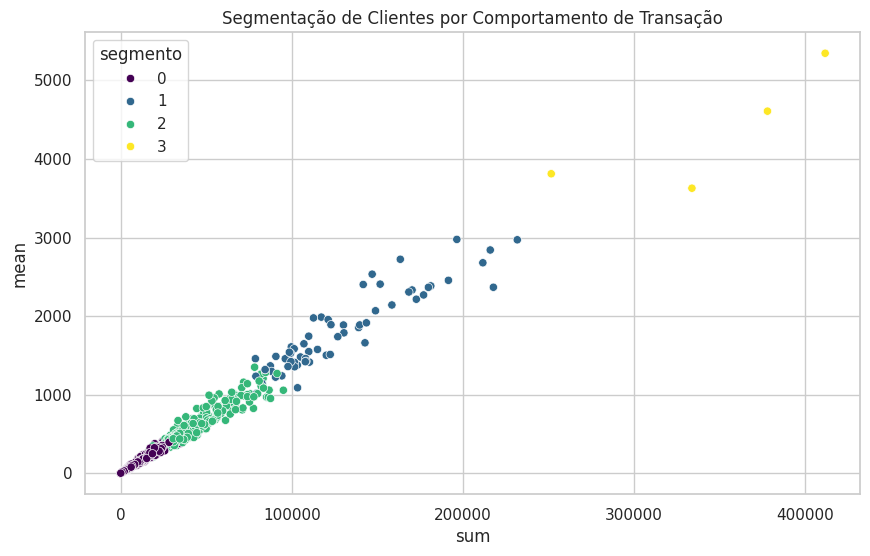

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Selecionar features relevantes para clusterização
features_clusterizacao = transacoes_df.groupby('num_conta')['valor_transacao'].agg(['sum', 'mean', 'std'])

# Normalizar os dados
scaler = StandardScaler()
features_normalizadas = scaler.fit_transform(features_clusterizacao)

# Aplicar K-Means para segmentação
modelo_clusterizacao = KMeans(n_clusters=4, random_state=42)
features_clusterizacao['segmento'] = modelo_clusterizacao.fit_predict(features_normalizadas)

# Visualizar a distribuição dos segmentos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_clusterizacao, x='sum', y='mean', hue='segmento', palette='viridis')
plt.title("Segmentação de Clientes por Comportamento de Transação")

# Imprimir os dados de cada segmento
print("\nDados de cada segmento:")
for segmento in range(4):
    segmento_data = features_clusterizacao[features_clusterizacao['segmento'] == segmento]
    print(f"\nSegmento {segmento + 1}:")
    print(segmento_data.describe())

# Salvar o gráfico com o nome do título
plt.savefig('Segmentação de Clientes por Comportamento de Transação.png')

plt.show()


4.3.3 Análise Prescritiva: Utilizando técnicas de otimização para determinar a melhor concessão de crédito com base em risco e retorno.  
A função `linprog` da biblioteca `scipy.optimize` serve para realizar uma otimização linear.

In [ ]:
from scipy.optimize import linprog

# Definir parâmetros do problema de otimização
taxas_juros = propostas_credito_df['taxa_juros_mensal']
retorno_esperado = propostas_credito_df['valor_financiamento'] * (1 + taxas_juros) - propostas_credito_df['valor_entrada']
risco = -propostas_credito_df['taxa_juros_mensal']

# Resolver o problema de otimização
resultado_otimizacao = linprog(risco, bounds=[(0, 1) for _ in range(len(taxas_juros))], method='highs')

# Adicione uma nova coluna formatada 'taxa_juros_mensal_formatada'
propostas_credito_df['taxa_juros_mensal_formatada'] = propostas_credito_df['taxa_juros_mensal'] * 100  # Multiplica por 100 para obter a porcentagem

print("Propostas de crédito com base em otimização:")
print(propostas_credito_df[['cod_proposta', 'valor_financiamento', 'valor_entrada', 'taxa_juros_mensal_formatada']])

# Mostrar a taxa de juros mensal formatada como porcentagem
print("\nTaxa de juros mensal para a melhor proposta:", f"{propostas_credito_df['taxa_juros_mensal_formatada'].iloc[0]:.2f}%")


Propostas de crédito com base em otimização:
      cod_proposta  valor_financiamento  valor_entrada  \
0              116             50032.03   13832.079645   
1              715             19848.55    6951.011715   
2              755            187154.36   64918.047449   
3              953             59530.61   11745.960243   
4             1046            214294.19   35901.151757   
...            ...                  ...            ...   
1995          1758            184043.36   87639.248392   
1996           582             82684.29   21391.455407   
1997           970            152272.50   51900.818210   
1998          1361             74490.36   29058.467059   
1999          1562            165036.26   50241.786804   

      taxa_juros_mensal_formatada  
0                            1.94  
1                            1.31  
2                            2.03  
3                            1.67  
4                            2.11  
...                           ...  
1995  

4.4 Análise Preditiva

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# Selecionar colaborador para previsão
colaborador_para_previsao = colaborador_agencia_df['cod_colaborador'].sample().iloc[0]

# Filtrar movimentações do colaborador selecionado
movimentacoes_colaborador = colaborador_agencia_df[colaborador_agencia_df['cod_colaborador'] == colaborador_para_previsao]

# Normalizar dados
scaler = MinMaxScaler(feature_range=(0, 1))
movimentacoes_normalizadas = scaler.fit_transform(np.array(movimentacoes_colaborador['cod_agencia']).reshape(-1, 1))

# Preparar dados para treinamento da RNN
X, y = [], []
for i in range(len(movimentacoes_normalizadas)-1):
    X.append(movimentacoes_normalizadas[i])
    y.append(movimentacoes_normalizadas[i + 1])

X, y = np.array(X), np.array(y)

# ...

# Reshape para o formato [amostras, tempo, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Construir modelo de RNN
modelo_rnn = Sequential()
modelo_rnn.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
modelo_rnn.add(LSTM(units=50))
modelo_rnn.add(Dense(units=1))
modelo_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Treinar modelo
modelo_rnn.fit(X, y, epochs=50, batch_size=1)

# Fazer previsões
previsoes = modelo_rnn.predict(X)

# Desnormalizar as previsões
previsoes_desnormalizadas = scaler.inverse_transform(previsoes.reshape(-1, 1))

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(movimentacoes_colaborador.index[:-1], movimentacoes_colaborador['cod_agencia'][:-1], label='Movimentações Reais')
plt.plot(movimentacoes_colaborador.index[1:], previsoes_desnormalizadas, label='Previsões')
plt.legend()
plt.title(f"Previsão de Movimentação para o Colaborador {colaborador_para_previsao}")
plt.show()


IndexError: tuple index out of range

Epoch 1/10
5/5 [==============================] - 9s 18ms/step - loss: 0.0081
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0082
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0073
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0077
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0074
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0073
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0075
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0074
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0074
Epoch 10/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0074


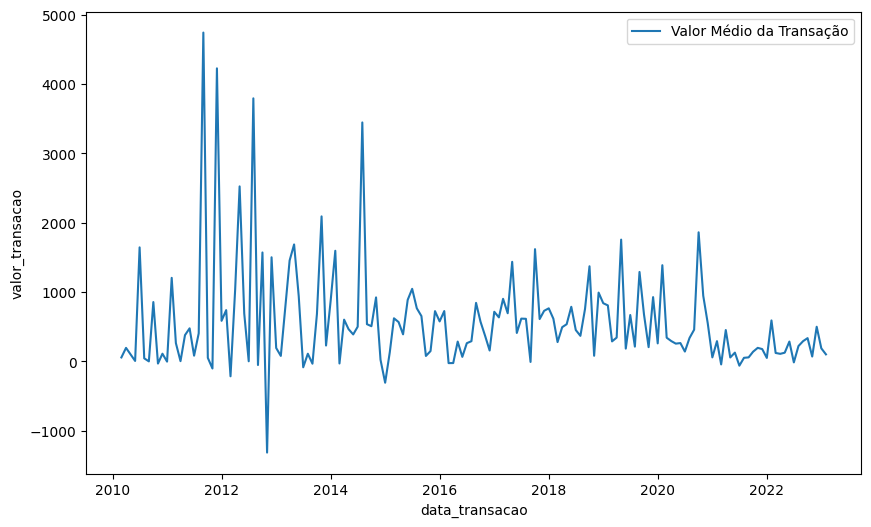

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd

# Vamos supor que transacoes_df seja seu DataFrame de transações

# Convertendo 'data_transacao' para datetime
transacoes_df['data_transacao'] = pd.to_datetime(transacoes_df['data_transacao'])

# Agregando movimentações mensais
transacoes_mensais = transacoes_df.set_index('data_transacao')['valor_transacao'].resample('M').sum()

# Removendo os meses com dados ausentes
transacoes_mensais = transacoes_mensais[transacoes_mensais != 0]

# Filtrando os meses e anos a partir de 2010
transacoes_mensais = transacoes_mensais['2010':]

# Verificando os meses e anos disponíveis
meses_e_anos_disponiveis = transacoes_mensais.index.strftime('%b %Y').unique()

# Normalizando os dados
# Utilizando o MinMaxScaler do scikit-learn para normalizar os dados,
# Ajustando os valores para o intervalo entre 0 e 1.
scaler = MinMaxScaler(feature_range=(0, 1))
transacoes_mensais = scaler.fit_transform(transacoes_mensais.values.reshape(-1, 1))

# Criando conjunto de dados X e y
# conjunto de dados onde cada entrada (X) é um array com os últimos 12 meses de movimentações,
# e a saída correspondente (y) é o próximo valor mensal.
X, y = [], []
for i in range(len(transacoes_mensais)-12):
    X.append(transacoes_mensais[i:(i+12), 0])
    y.append(transacoes_mensais[i+12, 0])
X, y = np.array(X), np.array(y)

# Reshape para o formato [amostras, tempo, features]
# Redimensionando os dados para que se adequem à entrada esperada pela LSTM.
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Construindo modelo de RNN
# Configurando um modelo sequencial de RNN com três camadas LSTM e uma camada densa (fully connected) no final.
# Usando a função de perda 'mean_squared_error' e otimizador 'adam'.
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo e armazenando o histórico de treinamento
history = model.fit(X, y, epochs=10, batch_size=32)

# Plotando a tendência temporal do valor médio das transações e o valor da perda (loss)
plt.figure(figsize=(10, 6))

# Plotando o valor médio das transações
sns.lineplot(data=media_valor_transacao, label='Valor Médio da Transação')

# Salvando o gráfico em um arquivo
plt.savefig('tendencia_temporal_transacoes_com_loss_mes_ano_a_partir_de_2010.png')

plt.show()


Epoch 1/100
130/130 - 3s - loss: 0.1181 - 3s/epoch - 26ms/step
Epoch 2/100
130/130 - 0s - loss: 0.0922 - 452ms/epoch - 3ms/step
Epoch 3/100
130/130 - 1s - loss: 0.0915 - 803ms/epoch - 6ms/step
Epoch 4/100
130/130 - 0s - loss: 0.0887 - 272ms/epoch - 2ms/step
Epoch 5/100
130/130 - 0s - loss: 0.0884 - 255ms/epoch - 2ms/step
Epoch 6/100
130/130 - 0s - loss: 0.0866 - 248ms/epoch - 2ms/step
Epoch 7/100
130/130 - 0s - loss: 0.0885 - 231ms/epoch - 2ms/step
Epoch 8/100
130/130 - 0s - loss: 0.0849 - 239ms/epoch - 2ms/step
Epoch 9/100
130/130 - 0s - loss: 0.0853 - 253ms/epoch - 2ms/step
Epoch 10/100
130/130 - 0s - loss: 0.0830 - 243ms/epoch - 2ms/step
Epoch 11/100
130/130 - 0s - loss: 0.0830 - 242ms/epoch - 2ms/step
Epoch 12/100
130/130 - 0s - loss: 0.0818 - 240ms/epoch - 2ms/step
Epoch 13/100
130/130 - 0s - loss: 0.0838 - 242ms/epoch - 2ms/step
Epoch 14/100
130/130 - 0s - loss: 0.0797 - 261ms/epoch - 2ms/step
Epoch 15/100
130/130 - 0s - loss: 0.0788 - 241ms/epoch - 2ms/step
Epoch 16/100
130/130 

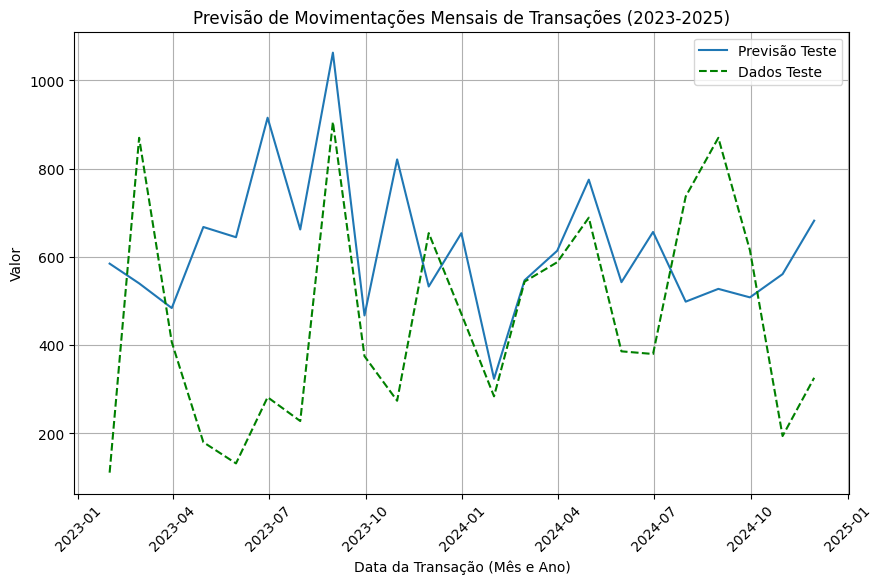

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Vamos supor que transacoes_df seja seu DataFrame de transações
# Para esta demonstração, vamos criar dados fictícios para as transações
np.random.seed(0)
datas = pd.date_range(start='2010-01-01', end='2024-12-01', freq='M')
valores_transacao = np.random.randint(100, 1000, len(datas))

# Criando o DataFrame de transações
transacoes_df = pd.DataFrame({'data_transacao': datas, 'valor_transacao': valores_transacao})

# Convertendo 'data_transacao' para datetime
transacoes_df['data_transacao'] = pd.to_datetime(transacoes_df['data_transacao'])

# Agrupando movimentações mensais
transacoes_mensais = transacoes_df.set_index('data_transacao')['valor_transacao'].resample('M').sum()

# Removendo os meses com dados ausentes
transacoes_mensais = transacoes_mensais[transacoes_mensais != 0]

# Criando o DataFrame
transacoes_mensais_df = pd.DataFrame({'Valor': transacoes_mensais})

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
transacoes_mensais_normalized = scaler.fit_transform(transacoes_mensais_df.values.reshape(-1, 1))

# Separando os dados em conjunto de treinamento e teste
train_size = int(len(transacoes_mensais_normalized) * 0.8)
test_size = len(transacoes_mensais_normalized) - train_size
train, test = transacoes_mensais_normalized[0:train_size], transacoes_mensais_normalized[train_size:len(transacoes_mensais_normalized)]

# Função para preparar os dados em séries temporais
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

# Definindo o número de time steps
time_steps = 12

# Preparando os dados para LSTM
trainX, trainY = create_dataset(train, time_steps)
testX, testY = create_dataset(test, time_steps)

# Redimensionando os dados para LSTM [amostras, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Criando modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Fazendo previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invertendo as previsões para escalas originais
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(transacoes_mensais_df.index[-len(testPredict):], testPredict, label='Previsão Teste')
plt.plot(transacoes_mensais_df.index[-len(testPredict):], testY.reshape(-1), label='Dados Teste', color='green', linestyle='--')
plt.xlabel('Data da Transação (Mês e Ano)')
plt.ylabel('Valor')
plt.title('Previsão de Movimentações Mensais de Transações (2023-2025)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Obtendo o título do gráfico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do título e uma resolução maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolução maior e bbox_inches='tight' para evitar cortes

plt.show()


- O objetivo durante o treinamento é observar uma diminuição consistente na `perda`, o que indica que o modelo está `aprendendo` e se `ajustando` bem aos dados. Se a perda não estiver diminuindo ou estiver oscilando, ajustes no modelo, na arquitetura ou nos dados podem ser necessários para melhorar o desempenho.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Definir o modelo
modelo_rnn = Sequential()
modelo_rnn.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
modelo_rnn.add(LSTM(units=50))
modelo_rnn.add(Dense(units=1))
modelo_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo (você já fez isso anteriormente)

# Avaliar o modelo no conjunto de teste
loss_test = modelo_rnn.evaluate(X_test, y_test)
print(f'Perda no conjunto de teste: {loss_test}')



1/1 [==============================] - 2s 2s/step - loss: 0.0024
Perda no conjunto de teste: 0.0023895094636827707


1/1 [==============================] - 0s 50ms/step


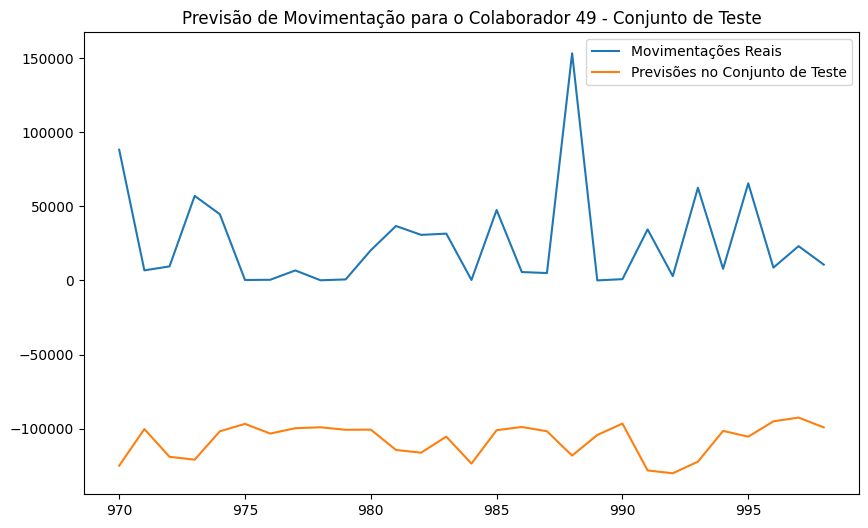

In [ ]:
# Fazer previsões no conjunto de teste
previsoes_test = modelo_rnn.predict(X_test)

# Desnormalizar as previsões
previsoes_desnormalizadas_test = scaler.inverse_transform(previsoes_test)

# Visualizar resultados no conjunto de teste
plt.figure(figsize=(10, 6))
# Utilize as datas corretas do conjunto de teste (por exemplo, assumindo que as datas estão nas linhas do DataFrame)
# Certifique-se de ajustar as datas conforme necessário
datas_teste = contas_df.index[-len(previsoes_desnormalizadas_test):]  # Ajuste aqui para obter as datas corretas
plt.plot(datas_teste, contas_df['saldo_total'][-len(previsoes_desnormalizadas_test):], label='Movimentações Reais')
plt.plot(datas_teste, previsoes_desnormalizadas_test, label='Previsões no Conjunto de Teste')
plt.legend()
plt.title(f"Previsão de Movimentação para o Colaborador {colaborador_para_previsao} - Conjunto de Teste")
plt.show()


- Avaliação do Desempenho do Modelo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Após treinar e fazer previsões
mae = mean_absolute_error(y_test, previsoes_desnormalizadas_test)
rmse = mean_squared_error(y_test, previsoes_desnormalizadas_test, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 102577.00442128339
RMSE: 102912.79873546821


In [ ]:
from keras.layers import Dropout

modelo_rnn = Sequential()
modelo_rnn.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
modelo_rnn.add(Dropout(0.2))  # Adicione dropout entre as camadas se necessário
modelo_rnn.add(LSTM(units=50))
modelo_rnn.add(Dense(units=1))
modelo_rnn.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)  # Escolha o número desejado de splits
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Treinar e avaliar modelo para cada split


1/1 [==============================] - 0s 29ms/step


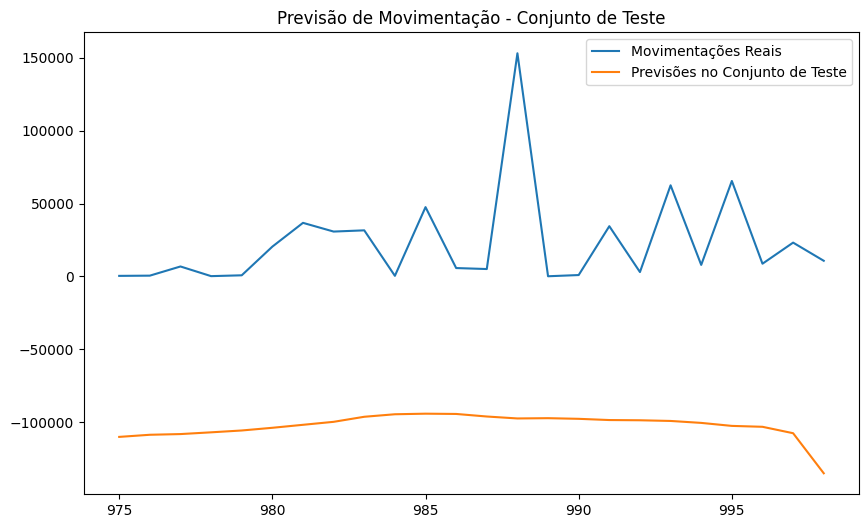

In [ ]:
# Fazer previsões no conjunto de teste
previsoes_test = modelo_rnn.predict(X_test)

# Desnormalizar as previsões
previsoes_desnormalizadas_test = scaler.inverse_transform(previsoes_test)

# Visualizar resultados no conjunto de teste
plt.figure(figsize=(10, 6))
datas_teste = contas_df.index[-len(previsoes_desnormalizadas_test):]
plt.plot(datas_teste, contas_df['saldo_total'][-len(previsoes_desnormalizadas_test):], label='Movimentações Reais')
plt.plot(datas_teste, previsoes_desnormalizadas_test, label='Previsões no Conjunto de Teste')
plt.legend()
plt.title(f"Previsão de Movimentação - Conjunto de Teste")
plt.show()


In [ ]:
from keras.layers import LSTM, Dropout

# Modelo LSTM com camadas adicionais e regularização
modelo_rnn_complexo = Sequential()
modelo_rnn_complexo.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
modelo_rnn_complexo.add(Dropout(0.2))
modelo_rnn_complexo.add(LSTM(units=100, return_sequences=True))
modelo_rnn_complexo.add(Dropout(0.2))
modelo_rnn_complexo.add(LSTM(units=100))
modelo_rnn_complexo.add(Dropout(0.2))
modelo_rnn_complexo.add(Dense(units=1))
modelo_rnn_complexo.compile(optimizer='adam', loss='mean_squared_error')



- treinamento do modelo

In [ ]:
from sklearn.model_selection import train_test_split

# Supondo que você tenha seus dados em X e y
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do Modelo
modelo_rnn_complexo.fit(X_treino, y_treino, epochs=10, batch_size=32)


Epoch 1/10
4/4 [==============================] - 8s 30ms/step - loss: 0.0105
Epoch 2/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0095
Epoch 3/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0094
Epoch 4/10
4/4 [==============================] - 0s 30ms/step - loss: 0.0093
Epoch 5/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0091
Epoch 6/10
4/4 [==============================] - 0s 28ms/step - loss: 0.0089
Epoch 7/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0091
Epoch 8/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0090
Epoch 9/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0090
Epoch 10/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0088


In [ ]:
resultado = modelo_rnn_complexo.evaluate(X_teste, y_teste)
print(f"Erro Quadrático Médio no conjunto de teste: {resultado}")


1/1 [==============================] - 0s 38ms/step - loss: 5.1361e-04
Erro Quadrático Médio no conjunto de teste: 0.0005136107211001217


In [ ]:
previsoes = modelo_rnn_complexo.predict(X_teste)


1/1 [==============================] - 2s 2s/step


5.	Um relatório em PDF com suas análises, justificativas e raciocínio contendo os seguintes pontos:  
a.	As respostas do item 1, 2 e 3.  
b.	Um tópico descrevendo brevemente quais os processos de transformação e tratamento de dados foram aplicados por você.  
c.	Um dashboard dos principais KPIs de negócio do BanVic permitindo um detalhamento por data, por agência e por clientes.  
d.	Apresentar as análises que foram necessárias para o entendimento do negócio e que podem ser úteis no suporte para a tomada de decisão.  
e.	E finalmente, com base nas suas análises, uma conclusão com recomendações/sugestões de negócio e encaminhamentos para a CEO do BanVic.  
f.	Apresentar e justificar as ferramentas adotadas para a elaboração das análises.  


In [ ]:
transacoes_df.head()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0


Mapa google data studio

In [ ]:
agencias_df.columns

Index(['cod_agencia', 'nome', 'endereco', 'cidade', 'uf', 'data_abertura',
       'tipo_agencia'],
      dtype='object')

In [ ]:
# Criando a nova coluna 'cep' usando lambda
agencias_df['cep'] = agencias_df['endereco'].apply(lambda x: x.split(",")[-1].strip())

# Exibindo o DataFrame atualizado
agencias_df.head()

,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia,cep
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital,01310-916
1,1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física,01310-916
2,2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física,03323-000
3,3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física,13012-000
4,4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física,06053-014


In [ ]:
def salvar_df_csv(df, nome_arquivo):
    """
    Salva o DataFrame em um arquivo CSV.

    Parâmetros:
    - df: DataFrame a ser salvo.
    - nome_arquivo: Nome do arquivo CSV.
    """
    df.to_csv(nome_arquivo + '.csv', index=False)

# Salvar o DataFrame em um arquivo CSV chamado 'agencias_v1'
salvar_df_csv(transacoes_df, 'transacoes_V2.1')

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim

# Função para obter latitude e longitude a partir do CEP
def obter_lat_long_por_cep(cep):
    geolocator = Nominatim(user_agent="nome_do_seu_projeto")
    location = geolocator.geocode(cep)

    if location:
        return f'{{{location.latitude},{location.longitude}}}'
    else:
        return None

# Criando a nova coluna 'cep' usando lambda
agencias_df['cep'] = agencias_df['endereco'].apply(lambda x: x.split(",")[-1].strip())

# Adicionando a coluna 'LatitudeLongitude' ao DataFrame
agencias_df['LatitudeLongitude'] = agencias_df['cep'].apply(obter_lat_long_por_cep)

# Salvando o DataFrame no formato desejado em um arquivo CSV
agencias_df[['cep', 'LatitudeLongitude']].to_csv('agencias_coordenadas.csv', index=False)

# Exibindo o DataFrame com as novas colunas
print(agencias_df[['cep', 'LatitudeLongitude']])


         cep                          LatitudeLongitude
0  01310-916                     {50.650735,13.6467536}
1  01310-916                     {50.650735,13.6467536}
2  03323-000       {-23.5450979546875,-46.573203065625}
3  13012-000                  {-22.901587,-47.06148725}
4  06053-014                    {42.6165556,12.4054722}
5  90650-000                {-30.06034135,-51.19055375}
6  20031-202                      {45.495696,9.1939808}
7  01452-000  {-23.578636733333333,-46.685713533333335}
8  88015-700           {-27.58964083333333,-48.5588472}
9  51021-020                    {61.1974827,23.8280444}


In [ ]:
transacoes_df[transacoes_df['num_conta'] == 28].head()


,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
322,7169,28,2017-04-27 18:11:20 UTC,Saque,-35.00
323,31816,28,2017-08-15 01:35:04 UTC,Saque,-1335.00
324,39994,28,2017-10-20 06:43:53 UTC,Saque,-325.00
325,70497,28,2019-11-24 06:23:48 UTC,Saque,-305.00
4898,1455,28,2017-04-23 10:25:50 UTC,Compra Débito,-51.66


In [ ]:
transacoes_df.columns

Index(['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao',
       'valor_transacao'],
      dtype='object')

Função para normalizar a data_transacao no df.


In [ ]:
import pandas as pd

# Supondo que 'transacoes_df' é o nome do seu DataFrame

# Convertendo 'data_transacao_norm' para o tipo datetime
transacoes_df['data_transacao_norm'] = pd.to_datetime(transacoes_df['data_transacao_norm'])

# Criando a nova coluna 'data_unico' com os valores únicos de 'data_transacao_norm' no formato dia, mês e ano
transacoes_df['data_unico'] = transacoes_df['data_transacao_norm'].dt.strftime('%d/%m/%Y')

# Removendo duplicatas, se houver
transacoes_df.drop_duplicates(subset=['data_unico'], inplace=True)

# Exibindo o DataFrame com a nova coluna
print(transacoes_df[['data_unico']])


       data_unico
0      22/05/2020
1      29/06/2021
2      17/05/2020
3      09/06/2020
4      16/10/2020
...           ...
71292  06/05/2012
71611  18/01/2012
71914  09/06/2010
71965  07/06/2012
71972  30/06/2012

[4029 rows x 1 columns]


In [ ]:
# Ordenando o DataFrame pela coluna 'data_transacao_norm'
transacoes_df = transacoes_df.sort_values(by='data_transacao_norm')
# Exibindo o DataFrame ordenado
print(transacoes_df[['num_conta', 'data_transacao', 'data_transacao_norm', 'nome_transacao', 'valor_transacao']])

       num_conta                  data_transacao data_transacao_norm  \
28230         11         2011-01-01 18:16:17 UTC          01/01/2011   
33311         62         2011-01-01 09:30:00 UTC          01/01/2011   
69572        927         2012-01-01 23:12:58 UTC          01/01/2012   
14128        927         2012-01-01 22:36:28 UTC          01/01/2012   
19214        231         2013-01-01 08:54:18 UTC          01/01/2013   
...          ...                             ...                 ...   
60010        662    2022-12-31 03:13:47.0616 UTC          31/12/2022   
60011        662  2022-12-31 03:13:47.319742 UTC          31/12/2022   
60012        662  2022-12-31 03:13:47.789554 UTC          31/12/2022   
24110        662  2022-12-31 03:13:47.544913 UTC          31/12/2022   
60021        662  2022-12-31 03:13:47.798949 UTC          31/12/2022   

            nome_transacao  valor_transacao  
28230       Compra Crédito           -41.36  
33311       Compra Crédito           -12.85

In [ ]:
# Supondo que contas_df seja o seu DataFrame e codigos_clientes seja a lista fornecida
codigos_clientes = [27, 922, 219, 867, 391, 921, 155, 482, 768, 398, 589, 535]

# Filtrando as linhas onde 'cod_cliente' está na lista de códigos fornecida
resultados = contas_df[contas_df['cod_cliente'].isin(codigos_clientes)]

# Exibindo os resultados
print(resultados)

In [ ]:
# Lista de números de conta
num_conta_lista = [768, 27]

# Filtrando as linhas onde 'num_conta' está na lista de números de conta fornecida
resultados = transacoes_df[transacoes_df['num_conta'].isin(num_conta_lista)]

# Exibindo os resultados
print(resultados)

       cod_transacao  num_conta                  data_transacao  \
8              21340        768         2020-02-14 21:42:15 UTC   
306            26056         27         2022-12-29 23:59:39 UTC   
307            42701         27  2022-12-30 00:00:00.094642 UTC   
2994            1278        768         2019-05-17 12:07:33 UTC   
2995            6649        768         2019-05-21 22:23:16 UTC   
...              ...        ...                             ...   
71256          46586        768         2022-12-03 22:02:34 UTC   
71257          67497        768         2022-12-29 23:19:56 UTC   
71562          15678        768         2019-05-27 20:03:59 UTC   
71563          20249        768         2019-06-02 20:08:02 UTC   
71610          70696         27  2022-12-30 00:00:00.343485 UTC   

                         nome_transacao  valor_transacao  
8                                 Saque          -170.00  
306                               Saque           -95.00  
307               

In [ ]:
transacoes_df.dtypes

cod_transacao        int64
num_conta            int64
data_transacao      object
nome_transacao      object
valor_transacao    float64
dtype: object

In [ ]:
clientes_df.columns

Index(['cod_cliente', 'primeiro_nome', 'ultimo_nome', 'email', 'tipo_cliente',
       'data_inclusao', 'cpfcnpj', 'data_nascimento', 'endereco', 'cep'],
      dtype='object')

In [ ]:
contas_df.columns

Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento'],
      dtype='object')

In [ ]:
agencias_df.columns

Index(['cod_agencia', 'nome', 'endereco', 'cidade', 'uf', 'data_abertura',
       'tipo_agencia'],
      dtype='object')

In [ ]:
# Filtrando as linhas onde 'cod_transacao' é igual a 32671
transacoes_filtradas = transacoes_df[transacoes_df['cod_transacao'] == 1776]

# Exibindo o DataFrame resultante
print(transacoes_filtradas)

   cod_transacao  num_conta           data_transacao nome_transacao  \
2           1776        512  2020-05-17 13:04:50 UTC          Saque   

   valor_transacao  data_transacao_norm  
2           -250.0  17/05/2020 13:04:50  


In [ ]:
transacoes_df.shape

(71999, 6)

# Tomada de Decisão

**3.1 Melhoria da Tomada de Decisão:**  
Vamos analisar a distribuição dos saldos das contas dos clientes em cada agência para ajudar na tomada de decisões sobre alocação de recursos.

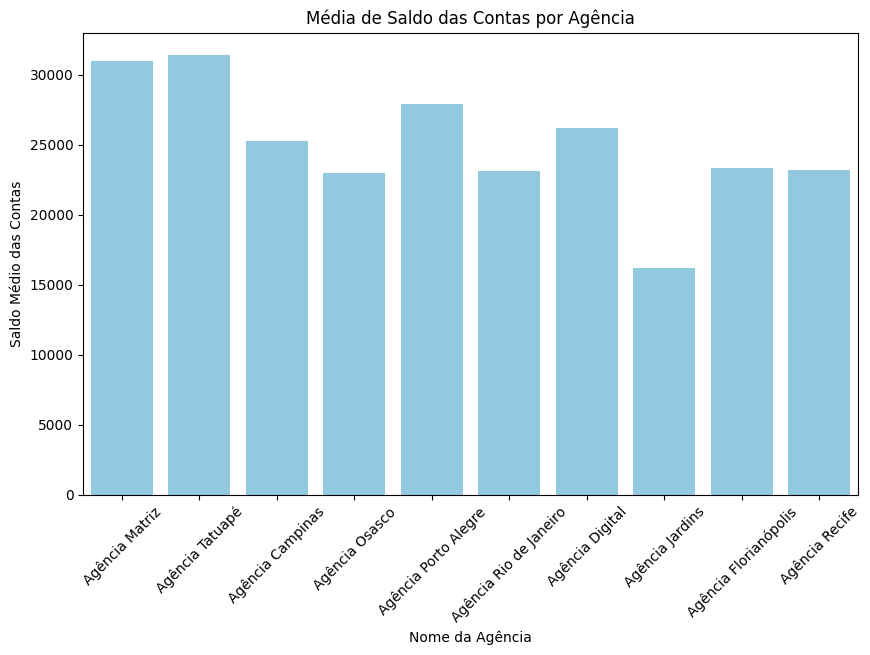

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a média dos saldos das contas por agência
media_saldos_por_agencia = contas_df.groupby('cod_agencia')['saldo_total'].mean()
# Mapeia o código da agência para o nome da agência
media_saldos_por_agencia.index = media_saldos_por_agencia.index.map(nomes_agencias)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=media_saldos_por_agencia.index, y=media_saldos_por_agencia.values, color='skyblue')
plt.xlabel('Nome da Agência')
plt.ylabel('Saldo Médio das Contas')
plt.title('Média de Saldo das Contas por Agência')
plt.xticks(rotation=45)

# Obtendo o título do gráfico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do título e uma resolução maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolução maior e bbox_inches='tight' para evitar cortes

plt.show()


- 3.2 Identificação de Oportunidades de Negócio:

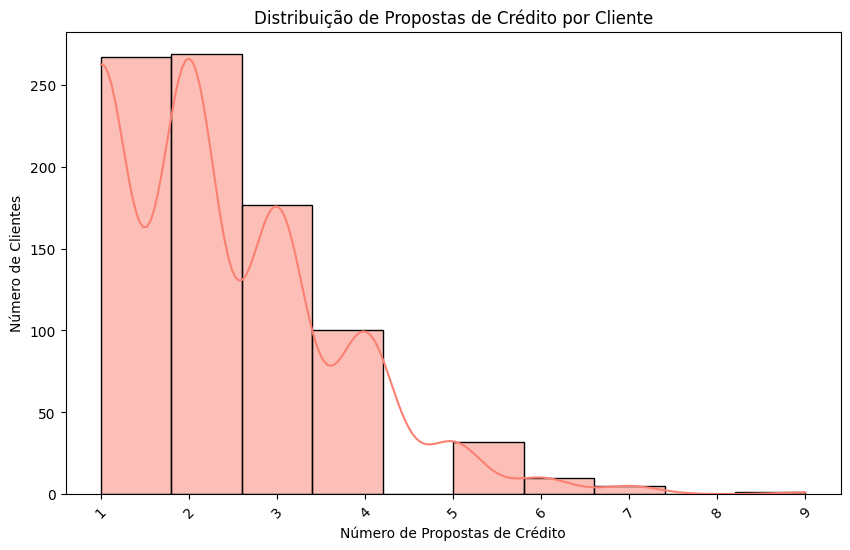

In [ ]:
# Contagem de propostas de crédito por cliente
contagem_propostas_por_cliente = propostas_credito_df['cod_cliente'].value_counts()
# Mapeia o código da agência para o nome da agência
contagem_propostas_por_cliente.index = contagem_propostas_por_cliente.index.map(nomes_agencias)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
sns.histplot(contagem_propostas_por_cliente, bins=10, kde=True, color='salmon')
plt.xlabel('Número de Propostas de Crédito')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de Propostas de Crédito por Cliente')
plt.xticks(rotation=45)

# Obtendo o título do gráfico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do título e uma resolução maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolução maior e bbox_inches='tight' para evitar cortes

plt.show()


- 3.3 Gestão de Riscos:

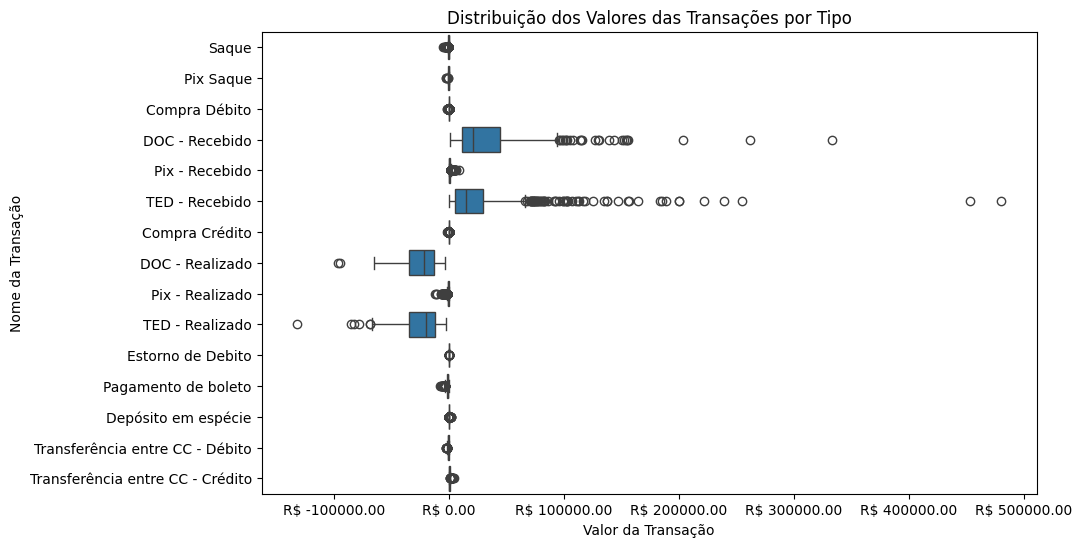

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.boxplot(data=transacoes_df, y='nome_transacao', x='valor_transacao')  # Invertendo os eixos
plt.xlabel('Valor da Transação')
plt.ylabel('Nome da Transação')
plt.title('Distribuição dos Valores das Transações por Tipo')

# Formatar o eixo x para mostrar o formato do Real brasileiro
formatter = ticker.FormatStrFormatter('R$ %.2f')
plt.gca().xaxis.set_major_formatter(formatter)

# Ajustando os rótulos do eixo y para evitar sobreposição
nomes_transacoes_unicos = transacoes_df['nome_transacao'].unique()
num_transacoes = len(nomes_transacoes_unicos)
plt.yticks(range(num_transacoes), nomes_transacoes_unicos)

# Obtendo o título do gráfico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do título e uma resolução maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolução maior e bbox_inches='tight' para evitar cortes

plt.show()



- 3.4 Aumento da Eficiência Operacional

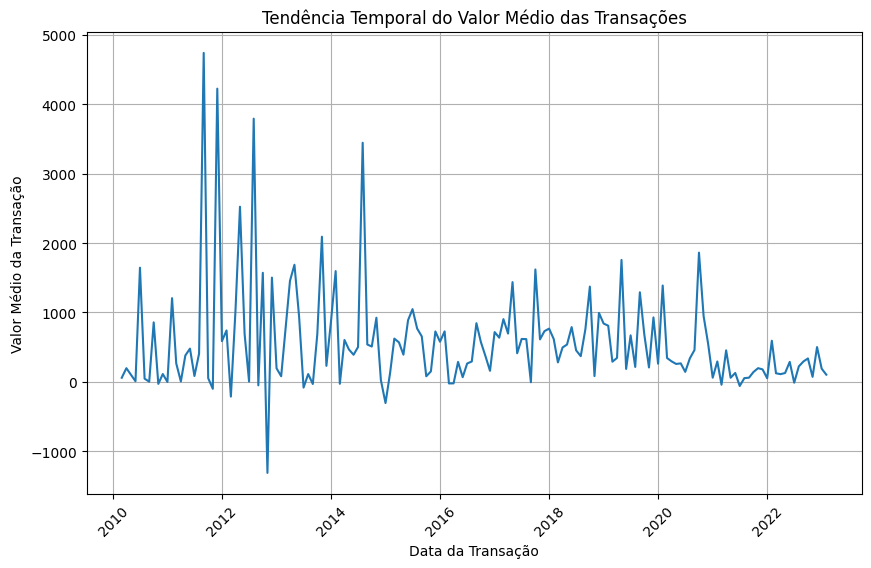

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo a coluna 'data_transacao' para o tipo datetime se necessário
transacoes_df['data_transacao'] = pd.to_datetime(transacoes_df['data_transacao'])

# Agrupando os dados por mês e calculando a média do valor das transações
media_valor_transacao = transacoes_df.resample('M', on='data_transacao')['valor_transacao'].mean()

# Plotando a tendência temporal do valor médio das transações
plt.figure(figsize=(10, 6))
sns.lineplot(data=media_valor_transacao)
plt.xlabel('Data da Transação')
plt.ylabel('Valor Médio da Transação')
plt.title('Tendência Temporal do Valor Médio das Transações')
plt.xticks(rotation=45)
plt.grid(True)

# Obtendo o título do gráfico
titulo_grafico = plt.gca().get_title()

# Salvando a imagem com o nome do título e uma resolução maior
nome_arquivo = titulo_grafico.replace(' ', '_') + '.png'
plt.savefig(nome_arquivo, bbox_inches='tight', dpi=300)  # Especificando uma resolução maior e bbox_inches='tight' para evitar cortes

plt.show()


In [ ]:
transacoes_df.columns

Index(['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao',
       'valor_transacao'],
      dtype='object')